<a href="https://colab.research.google.com/github/BoHye0202/Toy-Project/blob/main/2.Money%20Ball/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 선정 이유 및 문제 정의

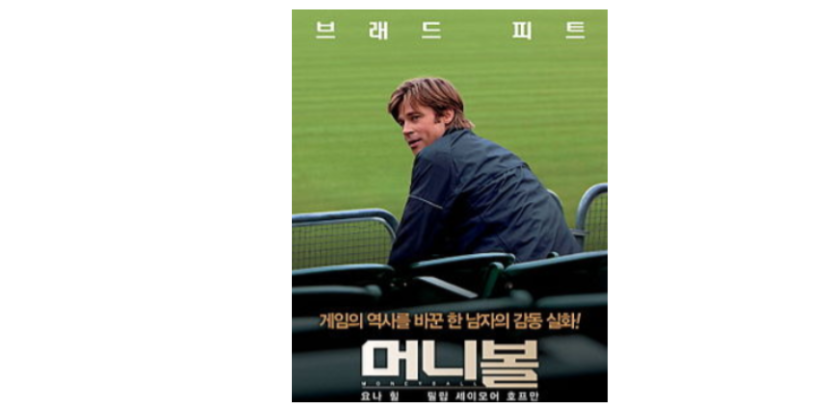

## 줄거리

메이저리그 만년 최하위에 그나마 실력 있는 선수들은 다른 구단에 뺏기기 일수인 '오클랜드 애슬레틱스'. 돈 없고 실력 없는 오합지졸 구단이란 오명을 벗어 던지고 싶은 단장 '빌리 빈(브래드 피트)'은 경제학을 전공한 '피터'를 영입, 기존의 선수 선발 방식과는 전혀 다른 파격적인 '머니볼' 이론을 따라 새로운 도전을 시작한다. 그는 경기 데이터에만 의존해 사생활 문란, 잦은 부상, 최고령 등의 이유로 다른 구단에서 외면 받던 선수들을 팀에 합류시키고, 모두가 미친 짓이라며 그를 비난한다. **출처: 네이버 영화**

## 데이터 선정 이유
설 연휴에 영화를 보고 싶어서 넷플릭스를 뒤적거리다가 우연히 보게된 영화 '머니볼'입니다. 머니볼 이론에 따라 나이, 성실, 사생활 등은 무시하고 오로지 데이터 분석을 통해 얻은 결과(insight)로 선수를 선발하여 메이저리그 만년 최하위에 있던 오클랜드 팀이 메이저리그 최초로 20연승이라는 신기록을 세웠습니다.

코로나 이전에 친구들이랑 야구 보러 가끔 갔는데 이번에 제가 영화 속 '브래드피트'라고 생각하고 타자의 OPS를 예측해보겠습니다.

## OPS란?
OPS = 출루율(OBP) + 장타율(SLG)

야구 OPS 뜻은 On Base Plus Slugging 의 약자입니다.

On Base는 출루율을 뜻하고 Slugging은 장타율을 뜻하는 것으로 출루율과 장타율을 합친 수치를 OPS 라고 합니다.

즉 얼마나 잘 출루하는 선수이고, 얼마나 장타를 잘 때려내는 선수인가

즉, 얼마나 좋은 타자인지를 알기 위한 지표로 사용되는 OPS는
출루율과 장타율을 단순히 1대1의 비율로 둔다는 점에서
여러 논란도 있지만
(출루율 5할, 장타율5할인 선수, 출루율 3할에 장타율7할인 선수 모두 ops는 1이라는 점) 계산이 어렵지 않고 한 눈에 비교해 볼 수 있어 여전히 많이 이용되는 스텟입니다.

일반적으로 ops가 .900이상의 타자라면 좋은 타자로 생각하며
ops가 1이 넘으면 팀을 대표하는, 리그에서 손에 꼽히는 타자로 생각합니다.


# 1. Data Pre-processing

## 패키지 불러오기

In [ ]:
# 데이터 분석 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# 그래프 시각화 옵션 
%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
import matplotlib.font_manager as fm

warnings.filterwarnings("ignore")

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumGothic')
# plt.rcParams['font.family'] = u'NanumGothic'

#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


## 데이터 크롤링

In [ ]:
# # 데이터 크롤링 모듈
# # !pip install selenium
# # !apt-get update # to update ubuntu to correctly run apt install
# # !apt install chromium-chromedriver

# from selenium import webdriver
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
# from bs4 import BeautifulSoup
# import re

In [ ]:
# # 크롤링
# driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
# # driver = webdriver.Chrome(executable_path=r'C:/Users/BOHYE/Downloads/chromedriver_win32/chromedriver.exe')

# for i in range(86):
    
#     # 1982년 부터 2018년 까지 statiz에 기록된 선수들 필터링 (총 8558명)
#     url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=1982&ye=2018&sn=100&pa={}'.format(i*100)
    
#     driver.get(url)
#     driver.implicitly_wait(5)
    
#     html = driver.find_element_by_xpath('//*[@id="mytable"]/tbody').get_attribute("innerHTML") #기록 table을 str형태로 저장
#     soup = BeautifulSoup(html, 'html.parser') #str 객체를 BeautifulSoup 객체로 변경
    
#     temp = [i.text.strip() for i in soup.findAll("tr")] #tr 태그에서, text만 저장하기
#     temp = pd.Series(temp) #list 객체에서 series 객체로 변경
    
#     #'순'이나 'W'로 시작하는 row 제거
#     # 즉, 선수별 기록만 남기고, index를 reset 해주기
#     temp = temp[~temp.str.match("[순W]")].reset_index(drop=True) 
    
#     temp = temp.apply(lambda x: pd.Series(x.split(' '))) #띄어쓰기 기준으로 나눠서 dataframe으로 변경
    
#     #선수 팀 정보 이후 첫번째 기록과는 space 하나로 구분, 그 이후로는 space 두개로 구분이 되어 있음 
#     #그래서 space 하나로 구분을 시키면, 빈 column들이 존재 하는데, 해당 column들 제거 
#     temp = temp.replace('', np.nan).dropna(axis=1) 
    
#     #WAR 정보가 들어간 column이 2개 있다. (index가 1인 column과, 제일 마지막 column)
#     #그 중에서 index가 1인 columm 제거 
#     temp = temp.drop(1, axis=1)
    
#     #선수 이름 앞의 숫자 제거
#     temp[0] = temp[0].str.replace("^\d+", '')

#     # 선수들의 생일 정보가 담긴 tag들 가지고 오기
#     birth = [i.find("a") for i in soup.findAll('tr') if 'birth' in i.find('a').attrs['href']]
    
#     # tag내에서, 생일 날짜만 추출하기 
#     p = re.compile("\d{4}\-\d{2}\-\d{2}")
#     birth = [p.findall(i.attrs['href'])[0] for i in birth]
    
#     # 생일 column 추가
#     temp['생일'] = birth
    
#     # page별 완성된 dataframe을 계속해서 result에 추가 시켜주기 
#     if i == 0:
#         result = temp
#     else:
#         result = result.append(temp)
#         result = result.reset_index(drop=True)
        
#     print(i, "완료")
        
# #column 명 정보 저장        
# columns = ['선수'] + [i.text for i in soup.findAll("tr")[0].findAll("th")][4:-3] + ['타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', 'WAR+', '생일']

# #column 명 추가
# result.columns = columns

# #webdriver 종료
# driver.close()

# print("최종 완료")

In [ ]:
# print(result.shape)
# result.head()
# result.to_csv('/content/baseball.csv')

## 데이터 불러오기

In [ ]:
url1 = '/content/Pre_Season_Batter.csv'
url2 = '/content/Regular_Season_Batter.csv'
url3 = '/content/Regular_Season_Batter_Day_by_Day_b4.csv'
url4 = '/content/submission.csv'
url = '/content/baseball.csv'

season = pd.read_csv(url1)
regular = pd.read_csv(url2)
dbd = pd.read_csv(url3)
sub = pd.read_csv(url4)
start = pd.read_csv(url)

print(season.shape)
print(regular.shape)
print(dbd.shape)
print(start.shape)

(1393, 29)
(2454, 29)
(112273, 20)
(8558, 29)


## 데이터 전처리 (Data Pre-processing)

### Data 수정

In [ ]:
# 이름 분리 해서, '이름' column 추가
start['이름'] = start['선수'].str.findall("^[ㄱ-힣]+").apply(lambda x: x[0])

# 기존 '선수' column 에 있던 이름 정보 제거
start['선수'] = start.apply(lambda x: x['선수'].replace(x['이름'], ''), axis=1)

In [ ]:
# '시즌' column 생성
start['시즌'] = start['선수'].apply(lambda x: x[:2])

# 기존 '선수' column 에 있던 시즌 정보 제거
start['선수'] = start.apply(lambda x: x['선수'].replace(x['시즌'],''), axis=1)

# 년도를 4자리 숫자로 바꾸어주기 ex) 98 -&gt; 1998, 15 -&gt; 2015
start['시즌'] = start['시즌'].apply(lambda x: int("20"+ x) if int(x) < 30 else int("19"+x))

In [ ]:
# 포지션
position = ['1B', '2B', '3B', 'SS', 'C', 'RF', 'LF', 'CF', 'DH']  # 9개

# 포지션 여부 확인
start['포지션여부'] = start['선수'].apply(lambda x : (np.isin(x[-2:], position) or np.isin(x[-1:], position))) 

# 포지션 분리
start['포지션'] = start['선수'].apply(lambda x: x[-2:] if x[-2:] in position else x[-1:])

#포지션이 기록 되어 있지 않으면, nan값 넣기 
start.loc[start['포지션여부']==False, '포지션'] = np.nan

In [ ]:
#statiz 사이트에, 2015시즌 조홍석 데이터에 생일이 기록 안되어 있음, 해당 시즌의 생일 추가 
start.loc[(start.이름 =='조홍석')&(start.시즌 ==2015),'생일'] = '1990-02-23'

In [ ]:
# 팀 & 나이 column 생성
start['팀'] = start.apply(lambda x: x['선수'].replace(x['포지션'],'') if type(x['포지션'])==str else x['선수'], axis=1)
start['나이'] = start.apply(lambda x: x['시즌'] - int(x['생일'][:4]) + 1, axis=1)

In [ ]:
# 선수별 고유 아이디 부여
info = start[['이름', '생일']].apply(lambda x: tuple(x), axis=1)

player_id = {}
for i,j in enumerate(info.unique()):
    player_id[j] = i
    
start['ID'] = start.apply(lambda x: player_id[tuple([x['이름'], x['생일']])], axis=1)

In [ ]:
# 개명한 선수 이름 수정
# 윤여운 -&gt; 윤수강 (submission : 윤수강 / statiz : 윤여운)
# 이유찬 -&gt; 이병휘 (submission : 이병휘 / statiz : 이유찬)

start['이름'] = start['이름'].replace("윤여운", "윤수강").replace('이유찬', '이병휘')

In [ ]:
# numeric data로 변환
float_columns = start.iloc[:,2:27].columns
start[float_columns] = start[float_columns].astype(float).fillna(0)

In [ ]:
# 필요한 features 선택
cols = ['ID', '이름', '생일', '팀', '시즌', '포지션', '나이'] + list(float_columns)
start = start[cols]

In [ ]:
# 프로야구 팀
# 삼성, 해태, 롯데, MBC, OB, 삼미, LG, 빙그레, 태평양, SK, 두산, KIA, 넥센, NC, KT, 키움
print(start['팀'].unique())

['해' 'N' '현' '삼' '롯' '빙' 'S' '넥' 'L' '두' '쌍' 'K' '한' 'O' 'M' 'LK' '히' 'k'
 '태' '청' '삼L' 'S해' '쌍현' 'LS' 'S한' '넥k' '롯k' 'L넥' '롯쌍' 'L현' 'S두' '태L' '삼한'
 '쌍O' 'KS' '롯삼' '롯두' '두한' '현S' 'L태' '해S' '한삼' '한태' 'SL' '넥롯' '빙삼' '삼쌍'
 '넥한' 'KL' '두S' 'SK' '롯S' '넥N' 'L롯' '쌍삼' '쌍해' '삼해' '태쌍' '넥두' '해빙' '현쌍'
 'K현' 'L한' '한L' '삼빙' 'L두' 'O한' '두P' 'LP' '롯P' '태P' 'OP' 'kN' '쌍롯' 'SP'
 '한P' '두K' '해P' '해삼' '빙P' '한S' 'k롯' '삼P' '해L' 'S넥' '삼롯P' '한쌍P' '쌍P' '현P'
 '넥P' 'NP' 'KP' 'kP' '두롯' '히P' 'K한P' '현LP' '두한P' 'MP' '청P' 'k롯P' '두L' 'K두'
 '한O' '한두' '삼롯' '두삼P' '쌍한' 'O쌍' '롯K' '해쌍' 'L해' '현K' 'K한' '롯넥' '넥K' '현L'
 'L삼' '한K' '두삼' '롯L' '한롯' 'S롯' '삼O' '롯M' 'KK' '삼K' '두넥' '두N' '해태' 'M롯'
 '삼태']


### Null Data

In [ ]:
import missingno as msno

# 결측 데이터 시각화
for col in start.columns:
  msg = '{:>15}\t Percent of Nan value: {:.2f}%'.format(col, 100*(start[col].isnull().sum()/start[col].shape[0]))
  print(msg)

             ID	 Percent of Nan value: 0.00%
             이름	 Percent of Nan value: 0.00%
             생일	 Percent of Nan value: 0.00%
              팀	 Percent of Nan value: 0.00%
             시즌	 Percent of Nan value: 0.00%
            포지션	 Percent of Nan value: 27.86%
             나이	 Percent of Nan value: 0.00%
              G	 Percent of Nan value: 0.00%
             타석	 Percent of Nan value: 0.00%
             타수	 Percent of Nan value: 0.00%
             득점	 Percent of Nan value: 0.00%
             안타	 Percent of Nan value: 0.00%
             2타	 Percent of Nan value: 0.00%
             3타	 Percent of Nan value: 0.00%
             홈런	 Percent of Nan value: 0.00%
             루타	 Percent of Nan value: 0.00%
             타점	 Percent of Nan value: 0.00%
             도루	 Percent of Nan value: 0.00%
             도실	 Percent of Nan value: 0.00%
             볼넷	 Percent of Nan value: 0.00%
             사구	 Percent of Nan value: 0.00%
             고4	 Percent of Nan value: 0.00%
         

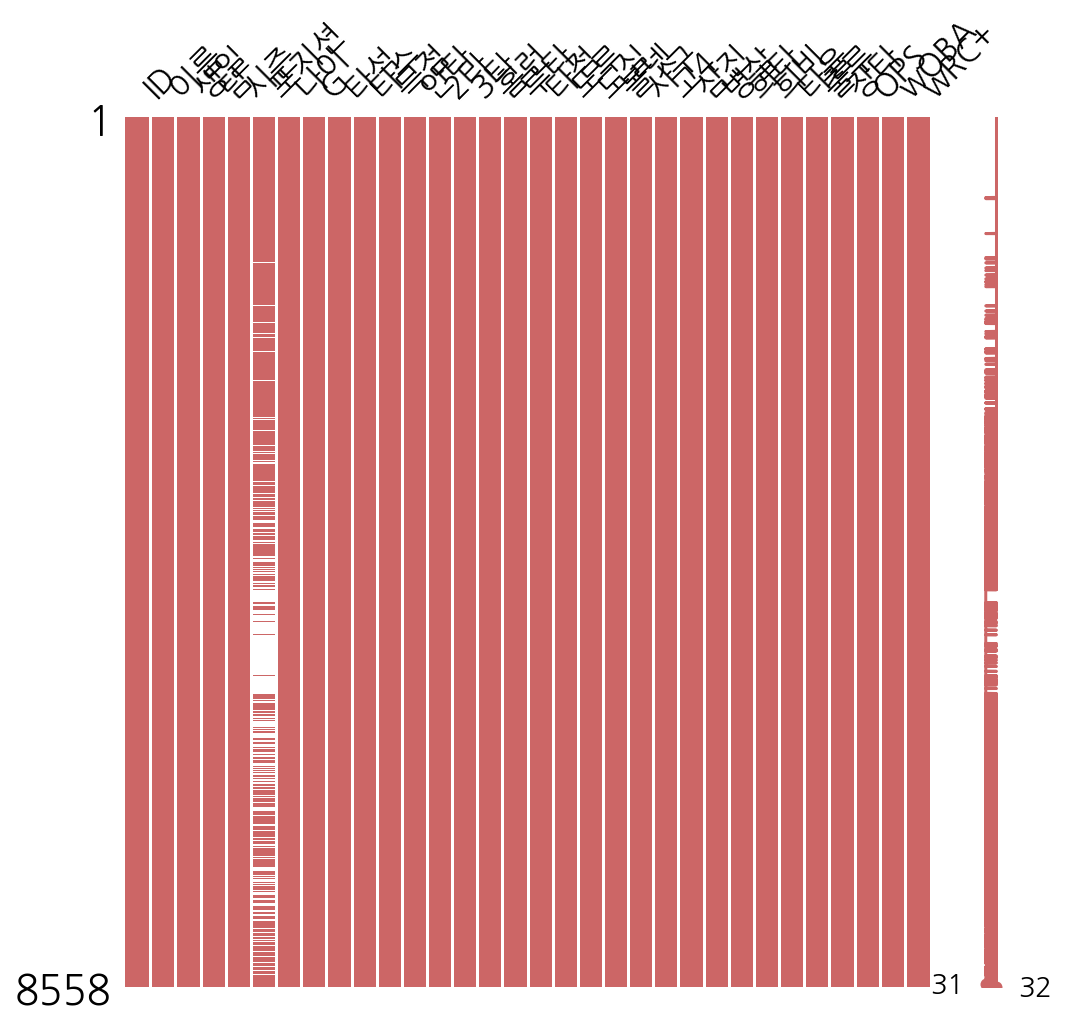

In [ ]:
msno.matrix(df=start.iloc[:,:],figsize = (8,8), color=(0.8, 0.4,0.4));

In [ ]:
a = start[start['포지션'].isna()==True] # Nan data
b = start[start['포지션'].isna()==False]

aa = a['이름'].unique()
bb = b['이름'].unique()
cc = set(aa) & set(bb)

x = {}
for j,row in b.iterrows():
  if row['이름'] in cc:
    x[b.loc[j,'이름']]=b.loc[j,'포지션']
print(len(x))

337


In [ ]:
for j,row in a.iterrows():
  if row['이름'] in x.keys():
    a.loc[j,'포지션'] = x[row['이름']]
a.head()

,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+
789,232,정성룡,1964-05-19,해,1993,LF,30,107.0,304.0,248.0,35.0,61.0,15.0,0.0,10.0,106.0,43.0,2.0,0.0,49.0,4.0,0.0,53.0,4.0,0.0,3.0,0.246,0.375,0.427,0.802,0.378,147.5
799,234,이시온,1975-09-24,롯,2003,NaN,29,90.0,377.0,338.0,45.0,98.0,19.0,1.0,13.0,158.0,45.0,7.0,1.0,33.0,6.0,1.0,92.0,10.0,0.0,0.0,0.290,0.363,0.467,0.831,0.373,125.0
1143,308,정문언,1962-08-13,태,1991,NaN,30,114.0,379.0,335.0,32.0,91.0,24.0,2.0,7.0,140.0,33.0,1.0,6.0,39.0,2.0,2.0,60.0,5.0,2.0,1.0,0.272,0.350,0.418,0.768,0.354,117.1
1380,356,펨버튼,1969-12-17,K,2002,NaN,34,75.0,316.0,271.0,28.0,69.0,13.0,1.0,11.0,117.0,48.0,2.0,1.0,23.0,19.0,3.0,56.0,6.0,0.0,3.0,0.255,0.351,0.432,0.783,0.347,112.9
1392,308,정문언,1962-08-13,태,1992,NaN,31,78.0,239.0,217.0,27.0,67.0,18.0,2.0,6.0,107.0,24.0,1.0,5.0,21.0,0.0,1.0,36.0,5.0,0.0,1.0,0.309,0.368,0.493,0.861,0.387,133.6


In [ ]:
base = pd.concat([a,b])
base.reset_index(inplace=True, drop=True)
print(base.shape)
base.head()

(8558, 32)


,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+
0,232,정성룡,1964-05-19,해,1993,LF,30,107.0,304.0,248.0,35.0,61.0,15.0,0.0,10.0,106.0,43.0,2.0,0.0,49.0,4.0,0.0,53.0,4.0,0.0,3.0,0.246,0.375,0.427,0.802,0.378,147.5
1,234,이시온,1975-09-24,롯,2003,NaN,29,90.0,377.0,338.0,45.0,98.0,19.0,1.0,13.0,158.0,45.0,7.0,1.0,33.0,6.0,1.0,92.0,10.0,0.0,0.0,0.290,0.363,0.467,0.831,0.373,125.0
2,308,정문언,1962-08-13,태,1991,NaN,30,114.0,379.0,335.0,32.0,91.0,24.0,2.0,7.0,140.0,33.0,1.0,6.0,39.0,2.0,2.0,60.0,5.0,2.0,1.0,0.272,0.350,0.418,0.768,0.354,117.1
3,356,펨버튼,1969-12-17,K,2002,NaN,34,75.0,316.0,271.0,28.0,69.0,13.0,1.0,11.0,117.0,48.0,2.0,1.0,23.0,19.0,3.0,56.0,6.0,0.0,3.0,0.255,0.351,0.432,0.783,0.347,112.9
4,308,정문언,1962-08-13,태,1992,NaN,31,78.0,239.0,217.0,27.0,67.0,18.0,2.0,6.0,107.0,24.0,1.0,5.0,21.0,0.0,1.0,36.0,5.0,0.0,1.0,0.309,0.368,0.493,0.861,0.387,133.6


### Duplicated Data
- 중복 데이터 처리하지 않았습니다.

In [ ]:
base.info()

# 중복데이터를 확인
print('전체 데이터의 수: ', len(base))
print('중복데이터의 수: ',base.duplicated().sum())

base.T.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8558 non-null   int64  
 1   이름      8558 non-null   object 
 2   생일      8558 non-null   object 
 3   팀       8558 non-null   object 
 4   시즌      8558 non-null   int64  
 5   포지션     6917 non-null   object 
 6   나이      8558 non-null   int64  
 7   G       8558 non-null   float64
 8   타석      8558 non-null   float64
 9   타수      8558 non-null   float64
 10  득점      8558 non-null   float64
 11  안타      8558 non-null   float64
 12  2타      8558 non-null   float64
 13  3타      8558 non-null   float64
 14  홈런      8558 non-null   float64
 15  루타      8558 non-null   float64
 16  타점      8558 non-null   float64
 17  도루      8558 non-null   float64
 18  도실      8558 non-null   float64
 19  볼넷      8558 non-null   float64
 20  사구      8558 non-null   float64
 21  고4      8558 non-null   float64
 22  

False

### New Feature

In [ ]:
# 1루타 feature 생성
base['1타'] = base['안타'] - base['2타'] - base['3타'] - base['홈런']

# 2. Target

## Pearson
**OPS와 높은 상관관계**
- 장타, 타율, wOBA, 출루, wRC+, G,루타, 타석,안타

**OPS와 낮은 상관관계**
- 나이, 희타, 도루, 고4, 3타, 도실, 사구, 희비

In [ ]:
# Find correlations with the target and sort
correlations = base.corr()['OPS'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(11))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 타수      0.605592
안타      0.607215
타석      0.607968
루타      0.609306
G       0.629108
wRC+    0.840125
출루      0.899422
wOBA    0.955104
타율      0.967631
장타      0.982626
OPS     1.000000
Name: OPS, dtype: float64

Most Negative Correlations:
 ID   -0.584981
시즌   -0.089776
나이    0.166977
희타    0.283392
도루    0.318953
고4    0.343499
3타    0.353408
도실    0.380572
사구    0.452578
희비    0.466994
Name: OPS, dtype: float64


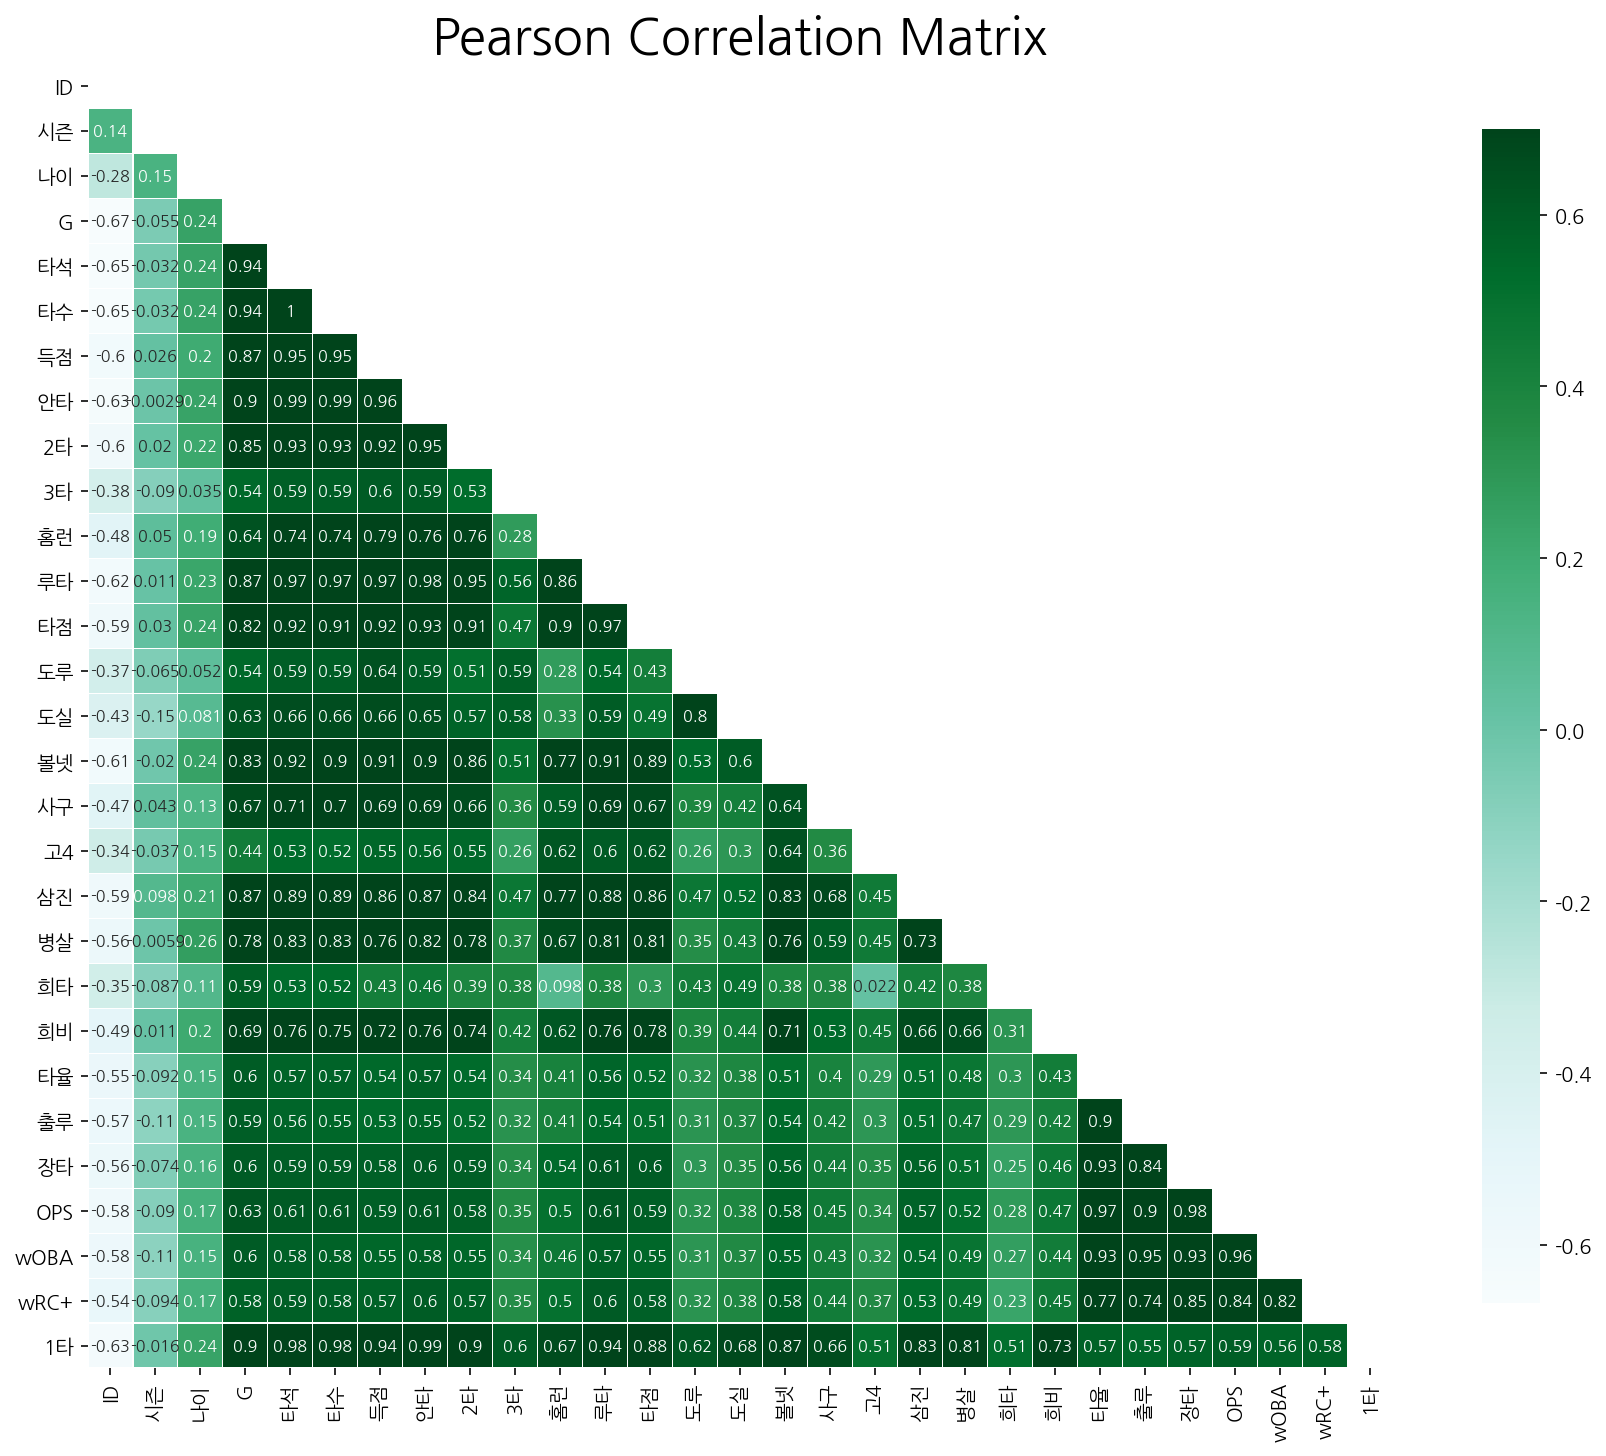

In [ ]:
pearson = base.corr()
mask = np.zeros_like((pearson), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(pearson,linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

## 포지션과 OPS
- violinplot: Box plot(분위수 확인)과 KDE plot(데이터의 분포 확인)을 동시에 할 수 있다
- C (포수) 포지션의 경우 다른 포지션에 비해서 outlier가 매우 큰 선수가 있는 것으로 보인다.

Text(0.5, 1.0, '포지션별 OPS violinplot')

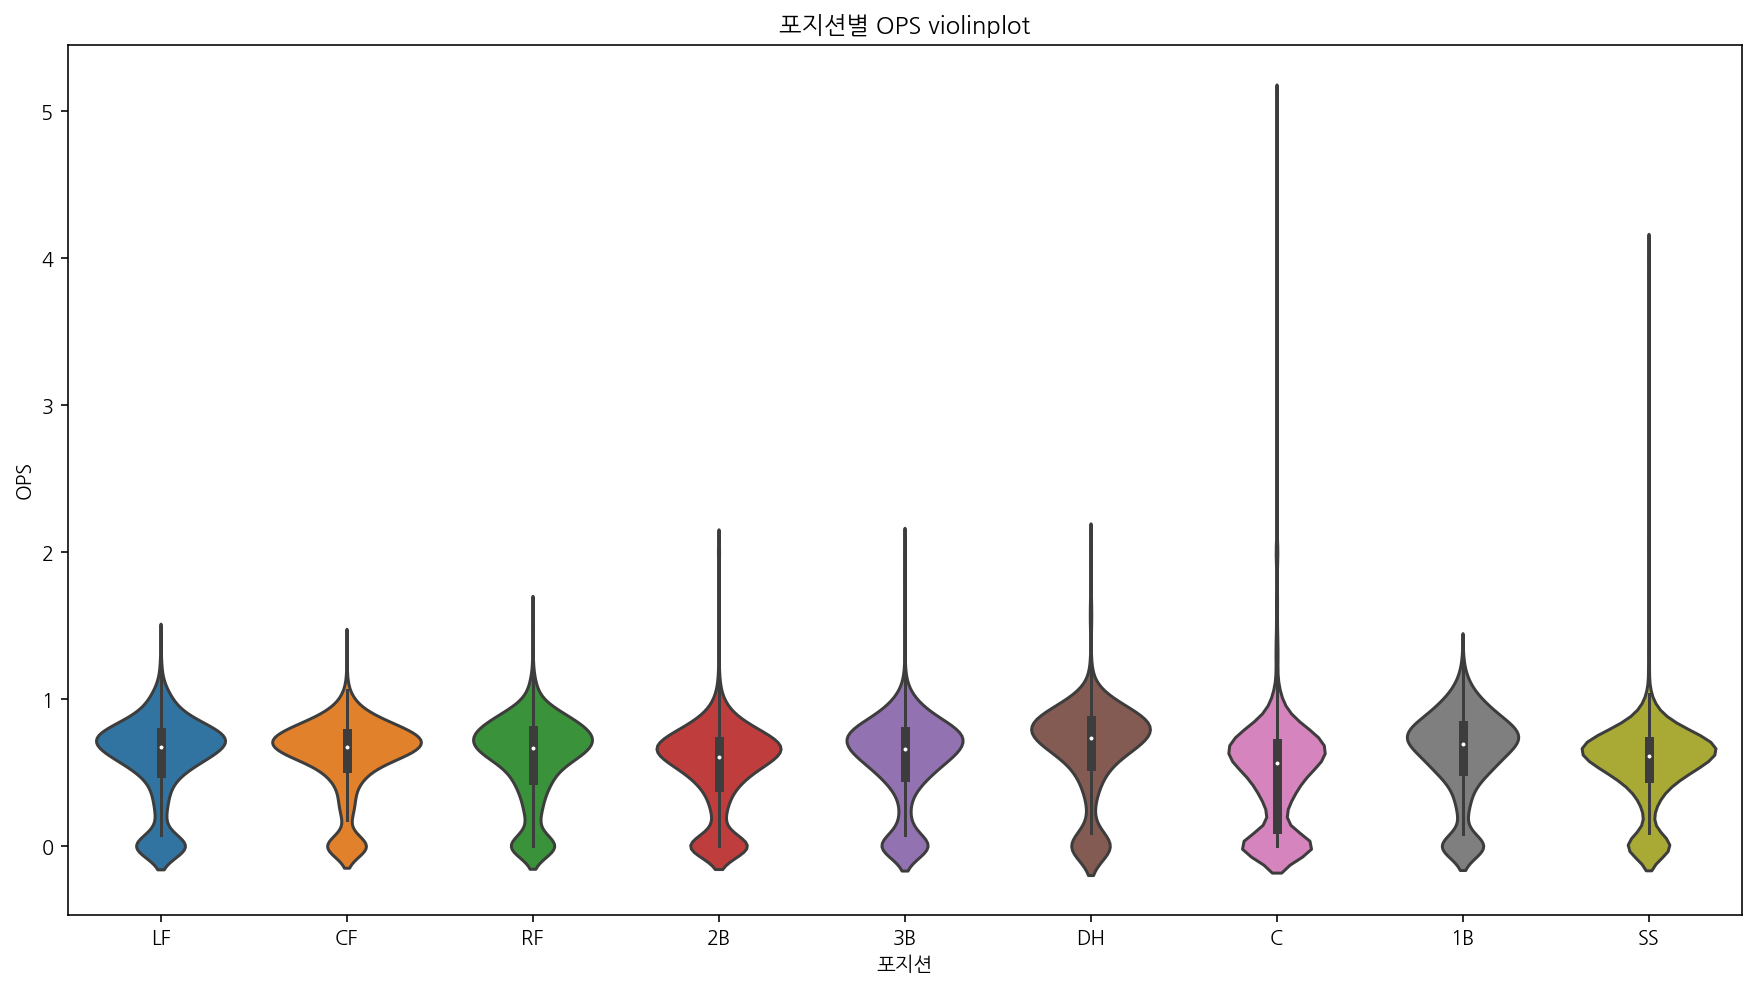

In [ ]:
# dtype이 object인 것과 OPS 추출
result_obj=base.loc[:,list(base.columns[base.dtypes=='object'])+['OPS']]

# 포지션별 OPS violinplot 그려보기
plt.figure(figsize=(15,8))
sns.violinplot(x='포지션',y='OPS',data=result_obj)
plt.title("포지션별 OPS violinplot")

In [ ]:
print(base.shape)
base.head()

(8558, 33)


,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,1타
0,232,정성룡,1964-05-19,해,1993,LF,30,107.0,304.0,248.0,35.0,61.0,15.0,0.0,10.0,106.0,43.0,2.0,0.0,49.0,4.0,0.0,53.0,4.0,0.0,3.0,0.246,0.375,0.427,0.802,0.378,147.5,36.0
1,234,이시온,1975-09-24,롯,2003,NaN,29,90.0,377.0,338.0,45.0,98.0,19.0,1.0,13.0,158.0,45.0,7.0,1.0,33.0,6.0,1.0,92.0,10.0,0.0,0.0,0.290,0.363,0.467,0.831,0.373,125.0,65.0
2,308,정문언,1962-08-13,태,1991,NaN,30,114.0,379.0,335.0,32.0,91.0,24.0,2.0,7.0,140.0,33.0,1.0,6.0,39.0,2.0,2.0,60.0,5.0,2.0,1.0,0.272,0.350,0.418,0.768,0.354,117.1,58.0
3,356,펨버튼,1969-12-17,K,2002,NaN,34,75.0,316.0,271.0,28.0,69.0,13.0,1.0,11.0,117.0,48.0,2.0,1.0,23.0,19.0,3.0,56.0,6.0,0.0,3.0,0.255,0.351,0.432,0.783,0.347,112.9,44.0
4,308,정문언,1962-08-13,태,1992,NaN,31,78.0,239.0,217.0,27.0,67.0,18.0,2.0,6.0,107.0,24.0,1.0,5.0,21.0,0.0,1.0,36.0,5.0,0.0,1.0,0.309,0.368,0.493,0.861,0.387,133.6,41.0


In [ ]:
baseball = base.copy()

## Feature Engineering

In [ ]:
stats = ['G','타석','타수','득점','안타','1타','2타','3타','홈런','루타','타점','도루',
         '도실','볼넷','사구','고4','삼진','병살','희타','희비','타율','출루','장타','OPS','wOBA','wRC+']
infos = ['ID','이름','생일','팀','시즌','포지션','나이']

In [ ]:
print(baseball.shape)
print(baseball.columns)
baseball.head()

(8558, 33)
Index(['ID', '이름', '생일', '팀', '시즌', '포지션', '나이', 'G', '타석', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', '1타'],
      dtype='object')


,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,1타
0,232,정성룡,1964-05-19,해,1993,LF,30,107.0,304.0,248.0,35.0,61.0,15.0,0.0,10.0,106.0,43.0,2.0,0.0,49.0,4.0,0.0,53.0,4.0,0.0,3.0,0.246,0.375,0.427,0.802,0.378,147.5,36.0
1,234,이시온,1975-09-24,롯,2003,NaN,29,90.0,377.0,338.0,45.0,98.0,19.0,1.0,13.0,158.0,45.0,7.0,1.0,33.0,6.0,1.0,92.0,10.0,0.0,0.0,0.290,0.363,0.467,0.831,0.373,125.0,65.0
2,308,정문언,1962-08-13,태,1991,NaN,30,114.0,379.0,335.0,32.0,91.0,24.0,2.0,7.0,140.0,33.0,1.0,6.0,39.0,2.0,2.0,60.0,5.0,2.0,1.0,0.272,0.350,0.418,0.768,0.354,117.1,58.0
3,356,펨버튼,1969-12-17,K,2002,NaN,34,75.0,316.0,271.0,28.0,69.0,13.0,1.0,11.0,117.0,48.0,2.0,1.0,23.0,19.0,3.0,56.0,6.0,0.0,3.0,0.255,0.351,0.432,0.783,0.347,112.9,44.0
4,308,정문언,1962-08-13,태,1992,NaN,31,78.0,239.0,217.0,27.0,67.0,18.0,2.0,6.0,107.0,24.0,1.0,5.0,21.0,0.0,1.0,36.0,5.0,0.0,1.0,0.309,0.368,0.493,0.861,0.387,133.6,41.0


In [ ]:
# 해당 시즌 이전까지의 누적 기록
def get_cumulative(player_id, season, stat=stats ,df=baseball):
    try:
        result_cum = df[(df['ID']==player_id) & (df['시즌'] <= season)][stat]
        result_cum = result_cum.mean()
        
    except:
        result_cum = [np.nan for i in stat]
        result_cum = pd.Series(result_cum)
    
    return result_cum

# 모든 stats에 대한 누적 stat
stats_cum = [i + '_누적' for i in stats]
print(stats_cum)

['G_누적', '타석_누적', '타수_누적', '득점_누적', '안타_누적', '1타_누적', '2타_누적', '3타_누적', '홈런_누적', '루타_누적', '타점_누적', '도루_누적', '도실_누적', '볼넷_누적', '사구_누적', '고4_누적', '삼진_누적', '병살_누적', '희타_누적', '희비_누적', '타율_누적', '출루_누적', '장타_누적', 'OPS_누적', 'wOBA_누적', 'wRC+_누적']


In [ ]:
# 누적 stat 데이터프레임에 반영
baseball[stats_cum] = baseball.apply(lambda x: get_cumulative(x['ID'], x['시즌']), axis=1)
print(baseball.shape)

(8558, 59)


In [ ]:
# lag stat (직전 몇년의 기록)
def get_lag(player_id, season, lag, stat=stats, df=baseball):
    try:
        result_lag = df[(df['ID']==player_id)&(df['시즌'] == season-lag)][stat].values[0]
        result_lag = pd.Series(result_lag)
        
    except:
        result_lag = [np.nan for i in stat]
        result_lag = pd.Series(result_lag)
        
    return result_lag
    
# 직전 1,2,3년의 기록
stats_lag1 = [i + '_LAG1' for i in stats]
stats_lag2 = [i + '_LAG2' for i in stats]
stats_lag3 = [i + '_LAG3' for i in stats]

In [ ]:
# lag1
baseball[stats_lag1] = baseball.apply(lambda x: get_lag(x['ID'],x['시즌'], lag=1), axis=1)

# lag2
baseball[stats_lag2] = baseball.apply(lambda x: get_lag(x['ID'],x['시즌'], lag=2), axis=1)

# lag3
baseball[stats_lag3] = baseball.apply(lambda x: get_lag(x['ID'],x['시즌'], lag=3), axis=1)

print(baseball.shape)

(8558, 137)


## 내년 기록 (OPS, 장타, 출루)
데이터 프레임의 정답 셋 만들기 위함

In [ ]:
def get_next_year(player_id, season, stat=['장타','출루','OPS'], df=baseball):
    try:
        baseball = df[(df['ID']==player_id)&(df['시즌']==season+1)][stat].values[0]
        baseball = pd.Series(baseball)
    except:
        baseball = [np.nan for i in stat]
        baseball = pd.Series(baseball)
        
    return baseball

# 장타, 출루, OPS의 내년 기록
stats_next = [i + '_NEXT' for i in ['장타', '출루', 'OPS']]
baseball[stats_next] = baseball.apply(lambda x: get_next_year(x['ID'], x['시즌']), axis=1)

print(baseball.shape)

(8558, 140)


# 3. Model

## Baseline Model
- Nan Data 없다
- 중복 데이터 4개 존재해서 제거
- 데이터의 정규화
- 노이즈 제거

In [ ]:
baseball['OPS_NEXT'].fillna(-1, inplace=True)
df = baseball.copy()
# df = baseball.fillna(-1) # nan값 -1로 impute 
df = df[df['OPS_NEXT'] > 0] # 다음 해의 OPS가 존재하는 값들만 추출 (다음 해 OPS 가 없다면, predict 값과 target값을 비교 할 수 없기 때문)

In [ ]:
for col in df.columns:
  msg = '{:>15}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df[col].isnull().sum()/df[col].shape[0]))
  print(msg)

             ID	 Percent of Nan value: 0.00%
             이름	 Percent of Nan value: 0.00%
             생일	 Percent of Nan value: 0.00%
              팀	 Percent of Nan value: 0.00%
             시즌	 Percent of Nan value: 0.00%
            포지션	 Percent of Nan value: 4.86%
             나이	 Percent of Nan value: 0.00%
              G	 Percent of Nan value: 0.00%
             타석	 Percent of Nan value: 0.00%
             타수	 Percent of Nan value: 0.00%
             득점	 Percent of Nan value: 0.00%
             안타	 Percent of Nan value: 0.00%
             2타	 Percent of Nan value: 0.00%
             3타	 Percent of Nan value: 0.00%
             홈런	 Percent of Nan value: 0.00%
             루타	 Percent of Nan value: 0.00%
             타점	 Percent of Nan value: 0.00%
             도루	 Percent of Nan value: 0.00%
             도실	 Percent of Nan value: 0.00%
             볼넷	 Percent of Nan value: 0.00%
             사구	 Percent of Nan value: 0.00%
             고4	 Percent of Nan value: 0.00%
          

In [ ]:
# 중복데이터를 확인
print('전체 데이터의 수: ', len(df))
print('중복데이터의 수: ',df.duplicated().sum())

# 중복데이터 Drop
df.drop_duplicates(inplace=True)

print(df.shape)

전체 데이터의 수:  4879
중복데이터의 수:  4
(4875, 140)


target이 약간 right skewed 되어 있습니다.

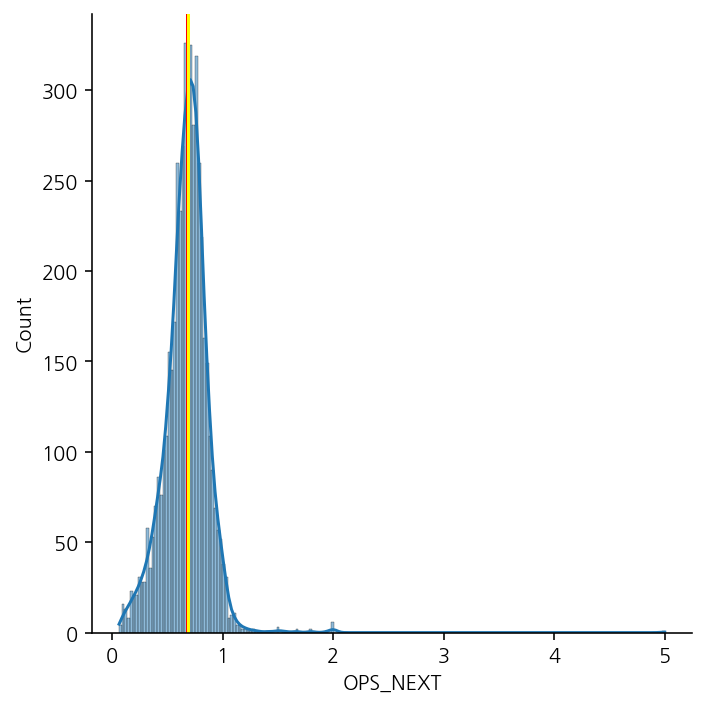

In [ ]:
sns.displot(df['OPS_NEXT'],kde=True);
plt.axvline(df['OPS_NEXT'].mean(), color='red');
plt.axvline(df['OPS_NEXT'].median(), color='yellow');

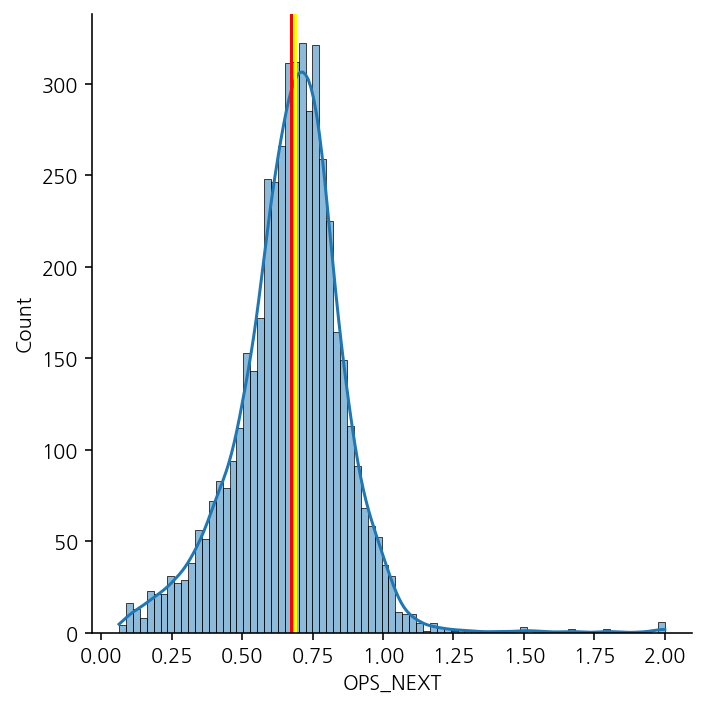

In [ ]:
df['OPS_NEXT'].sort_values()
df = df[df['OPS_NEXT']<=2]

sns.displot(df['OPS_NEXT'],kde=True);
plt.axvline(df['OPS_NEXT'].mean(), color='red');
plt.axvline(df['OPS_NEXT'].median(), color='yellow');

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score

# 기준모델의 MAE, MSE, RMSE, R2 계산
basem = df['OPS_NEXT'].mean()
mae_base = mean_absolute_error(df['OPS_NEXT'], [basem]*len(df))
mse_base = mean_squared_error(df['OPS_NEXT'], [basem]*len(df))
rmse_base = math.sqrt(mse_base)
r_base = r2_score(df['OPS_NEXT'], [basem]*len(df))

res_col = ['MAE', 'RMSE', 'R squared', 'variance']
result = pd.DataFrame(columns=res_col)
result.loc['Baseline'] = [mae_base, rmse_base, r_base, explained_variance_score([basem]*len(df), df['OPS_NEXT'])]

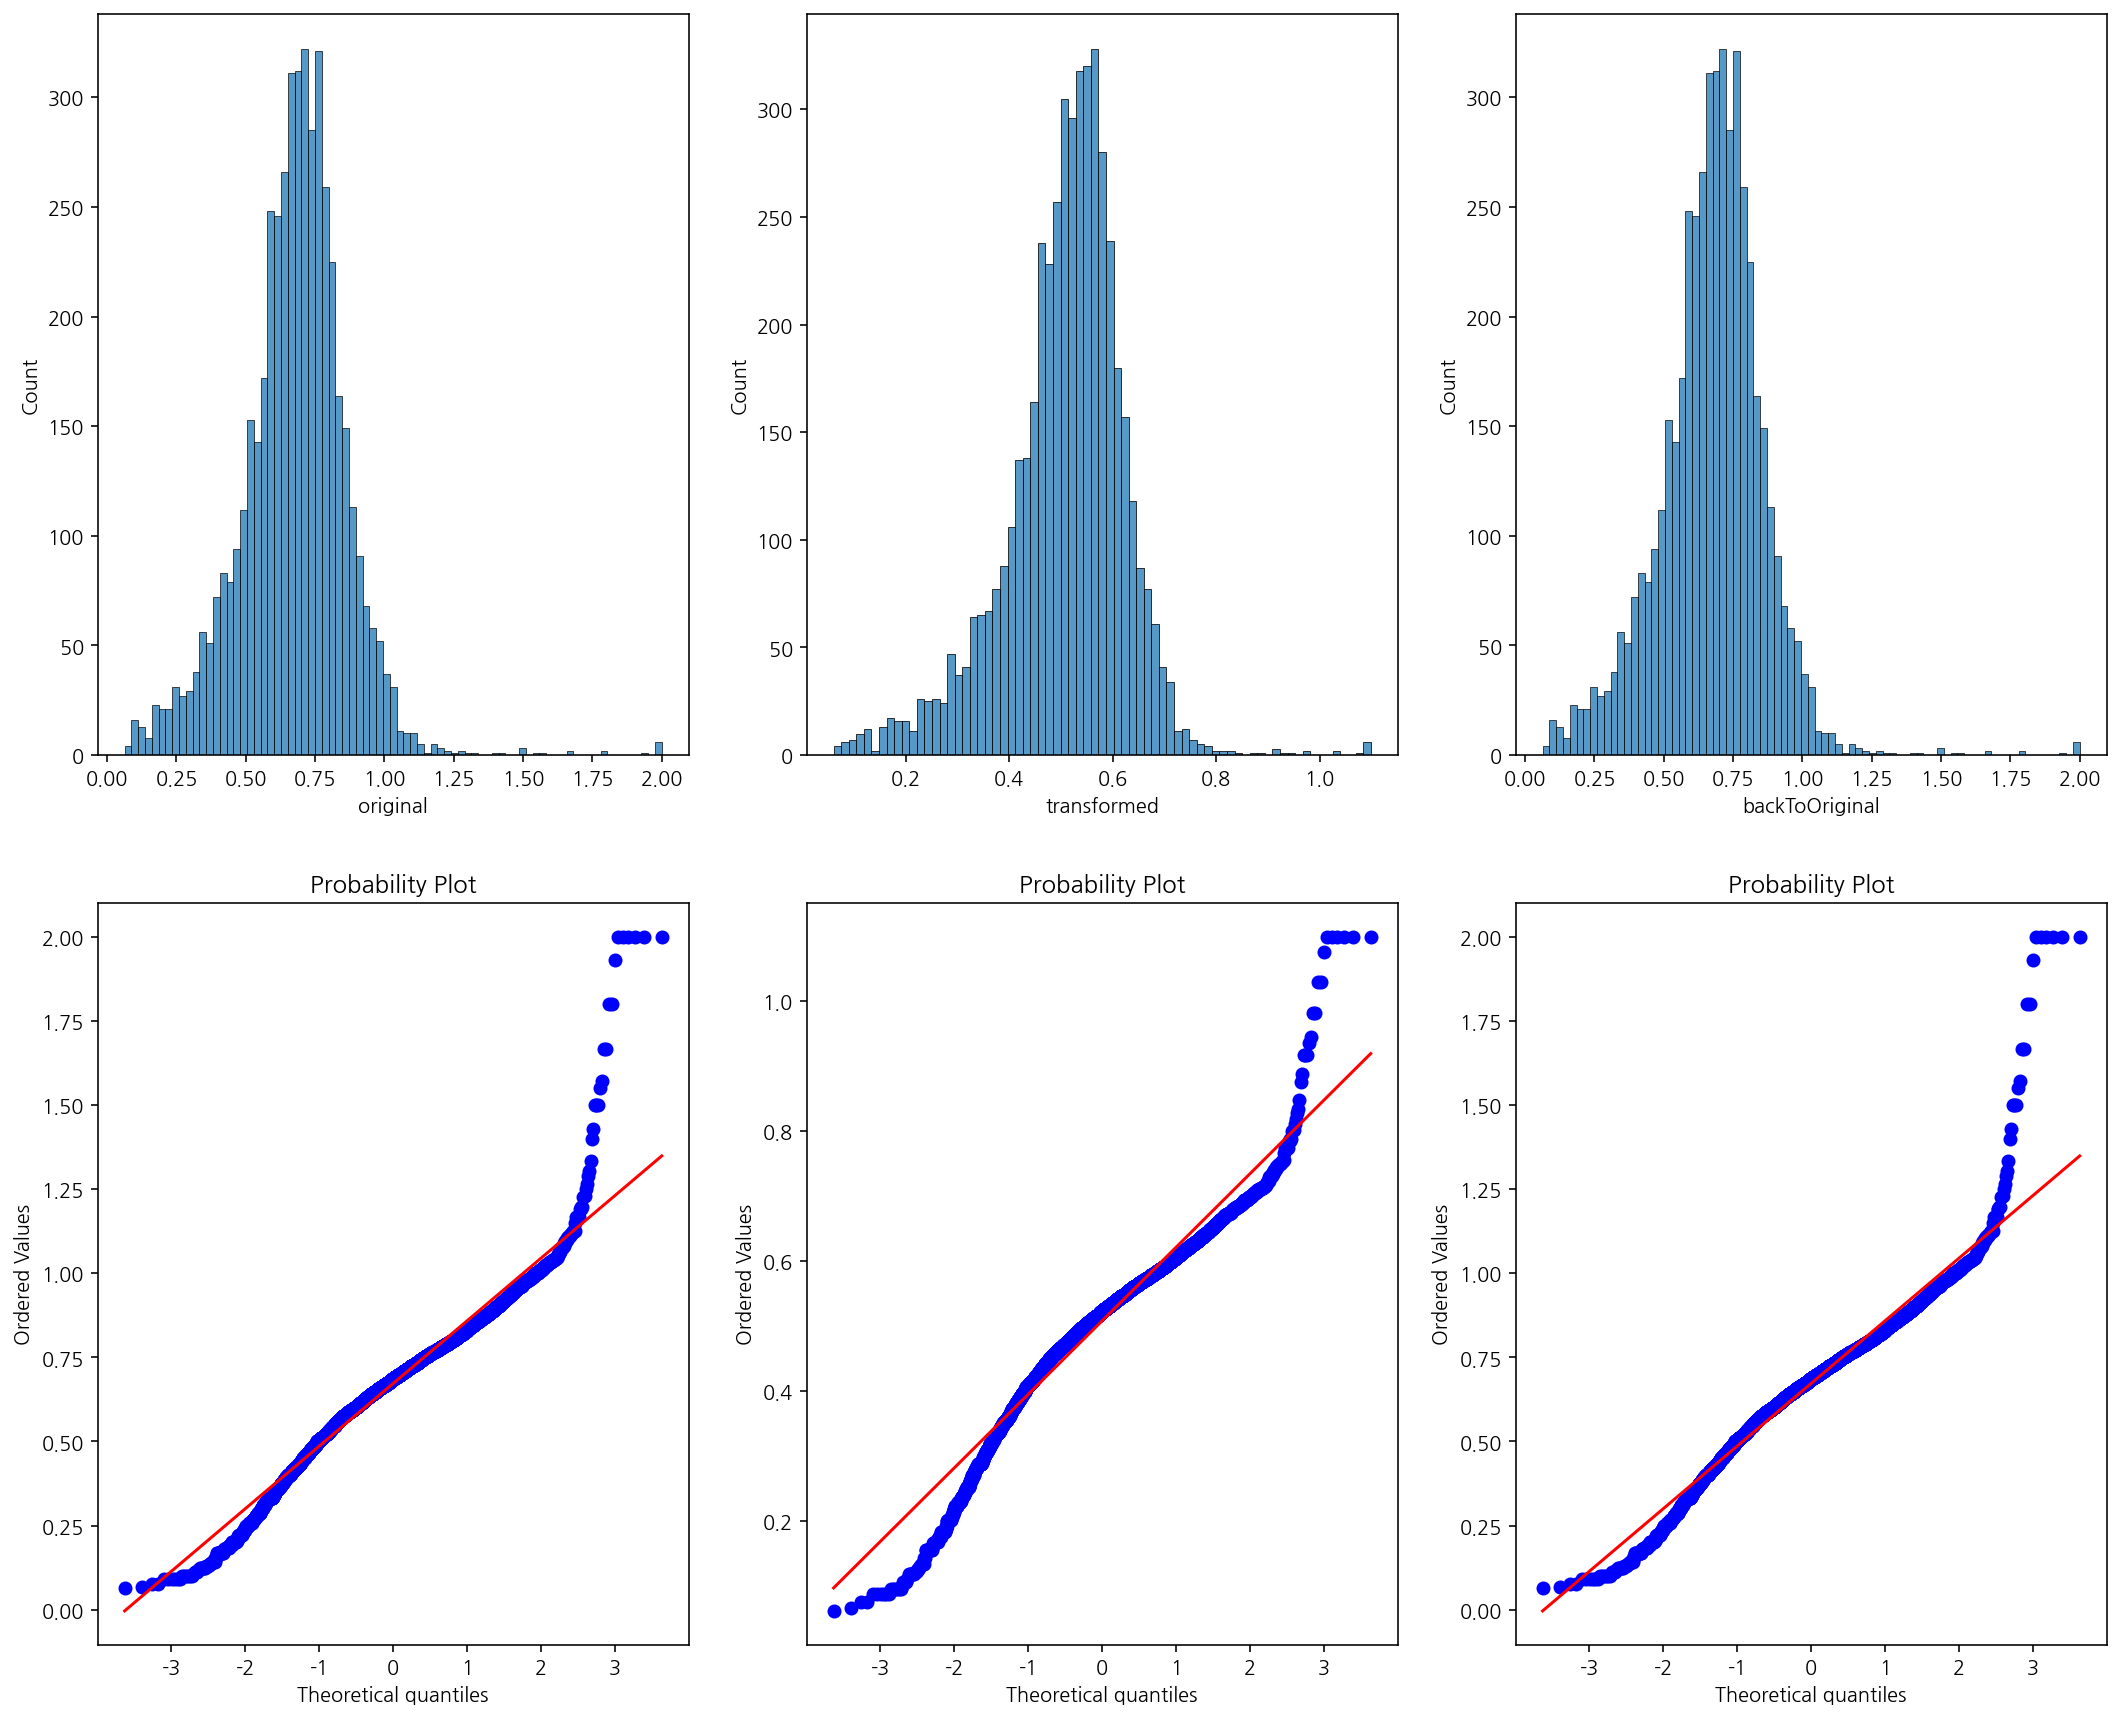

In [ ]:
from scipy import stats
target = df['OPS_NEXT']
plots=pd.DataFrame()
plots['original']=target
plots['transformed']=np.log1p(target)
plots['backToOriginal']=np.expm1(np.log1p(target))

fig,axes = plt.subplots(2,3,figsize=(18,15))
sns.histplot(plots['original'],ax=axes[0][0])
stats.probplot(plots['original'], dist='norm', fit=True, plot=axes[1][0])

sns.histplot(plots['transformed'],ax=axes[0][1])
stats.probplot(plots['transformed'], dist='norm', fit=True, plot=axes[1][1])

sns.histplot(plots['backToOriginal'],ax=axes[0][2])
stats.probplot(plots['backToOriginal'], dist='norm', fit=True, plot=axes[1][2]);

## Train / Valid / Test set

In [ ]:
print(len(df.columns))
df.head(3)

140


,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,1타,G_누적,타석_누적,타수_누적,득점_누적,안타_누적,1타_누적,2타_누적,...,고4_LAG2,삼진_LAG2,병살_LAG2,희타_LAG2,희비_LAG2,타율_LAG2,출루_LAG2,장타_LAG2,OPS_LAG2,wOBA_LAG2,wRC+_LAG2,G_LAG3,타석_LAG3,타수_LAG3,득점_LAG3,안타_LAG3,1타_LAG3,2타_LAG3,3타_LAG3,홈런_LAG3,루타_LAG3,타점_LAG3,도루_LAG3,도실_LAG3,볼넷_LAG3,사구_LAG3,고4_LAG3,삼진_LAG3,병살_LAG3,희타_LAG3,희비_LAG3,타율_LAG3,출루_LAG3,장타_LAG3,OPS_LAG3,wOBA_LAG3,wRC+_LAG3,장타_NEXT,출루_NEXT,OPS_NEXT
0,232,정성룡,1964-05-19,해,1993,LF,30,107.0,304.0,248.0,35.0,61.0,15.0,0.0,10.0,106.0,43.0,2.0,0.0,49.0,4.0,0.0,53.0,4.0,0.0,3.0,0.246,0.375,0.427,0.802,0.378,147.5,36.0,48.222222,107.333333,90.777778,11.333333,21.222222,14.666667,4.0,...,0.0,23.0,1.0,2.0,0.0,0.295,0.400,0.470,0.870,0.398,146.1,33.0,74.0,64.0,11.0,14.0,9.0,2.0,0.0,3.0,25.0,9.0,1.0,1.0,8.0,1.0,0.0,7.0,0.0,0.0,1.0,0.219,0.311,0.391,0.701,0.330,99.0,0.344,0.318,0.662
2,308,정문언,1962-08-13,태,1991,NaN,30,114.0,379.0,335.0,32.0,91.0,24.0,2.0,7.0,140.0,33.0,1.0,6.0,39.0,2.0,2.0,60.0,5.0,2.0,1.0,0.272,0.350,0.418,0.768,0.354,117.1,58.0,114.000000,379.000000,335.000000,32.000000,91.000000,58.000000,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493,0.368,0.861
5,365,이경복,1970-11-19,해,1994,NaN,25,78.0,224.0,205.0,27.0,67.0,10.0,1.0,4.0,91.0,25.0,1.0,0.0,8.0,4.0,0.0,12.0,7.0,5.0,2.0,0.327,0.361,0.444,0.805,0.363,130.4,52.0,26.833333,57.833333,53.666667,6.666667,15.833333,11.833333,3.0,...,0.0,4.0,2.0,1.0,0.0,0.298,0.333,0.439,0.772,0.346,106.1,14.0,28.0,27.0,3.0,4.0,3.0,1.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.148,0.148,0.185,0.333,0.149,-22.3,0.290,0.292,0.582


In [ ]:
# 사용 features 명시
infos = ['ID','이름','생일','팀','시즌','포지션','나이']
stats = ['G','타수','득점','안타','1타','2타','3타','홈런','루타','타점','도루','도실','볼넷','사구','고4',
         '삼진','병살','희타','희비','타율','출루','장타','OPS']

# 누적 및 lag stat features 이름
stats_cum = [i + '_누적' for i in stats]
stats_lag1 = [i + '_LAG1' for i in stats]
stats_lag2 = [i + '_LAG2' for i in stats]
stats_lag3 = [i + '_LAG3' for i in stats]

In [ ]:
# X features와 y feature 정리
stats_position = ['2B', '3B', 'C', 'CF', 'DH', 'LF', 'RF', 'SS']
X_cols = stats + stats_cum + stats_lag1 + stats_lag2 + stats_position + ['나이']
y_cols = ['OPS_NEXT']

print(X_cols)
print(len(X_cols))

['G', '타수', '득점', '안타', '1타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루', '장타', 'OPS', 'G_누적', '타수_누적', '득점_누적', '안타_누적', '1타_누적', '2타_누적', '3타_누적', '홈런_누적', '루타_누적', '타점_누적', '도루_누적', '도실_누적', '볼넷_누적', '사구_누적', '고4_누적', '삼진_누적', '병살_누적', '희타_누적', '희비_누적', '타율_누적', '출루_누적', '장타_누적', 'OPS_누적', 'G_LAG1', '타수_LAG1', '득점_LAG1', '안타_LAG1', '1타_LAG1', '2타_LAG1', '3타_LAG1', '홈런_LAG1', '루타_LAG1', '타점_LAG1', '도루_LAG1', '도실_LAG1', '볼넷_LAG1', '사구_LAG1', '고4_LAG1', '삼진_LAG1', '병살_LAG1', '희타_LAG1', '희비_LAG1', '타율_LAG1', '출루_LAG1', '장타_LAG1', 'OPS_LAG1', 'G_LAG2', '타수_LAG2', '득점_LAG2', '안타_LAG2', '1타_LAG2', '2타_LAG2', '3타_LAG2', '홈런_LAG2', '루타_LAG2', '타점_LAG2', '도루_LAG2', '도실_LAG2', '볼넷_LAG2', '사구_LAG2', '고4_LAG2', '삼진_LAG2', '병살_LAG2', '희타_LAG2', '희비_LAG2', '타율_LAG2', '출루_LAG2', '장타_LAG2', 'OPS_LAG2', '2B', '3B', 'C', 'CF', 'DH', 'LF', 'RF', 'SS', '나이']
101


In [ ]:
df = pd.concat([df, pd.get_dummies(df['포지션'], drop_first=True)], axis=1) # 포지션 dummy variable로 변환
df.head()

,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,1타,G_누적,타석_누적,타수_누적,득점_누적,안타_누적,1타_누적,2타_누적,...,OPS_LAG2,wOBA_LAG2,wRC+_LAG2,G_LAG3,타석_LAG3,타수_LAG3,득점_LAG3,안타_LAG3,1타_LAG3,2타_LAG3,3타_LAG3,홈런_LAG3,루타_LAG3,타점_LAG3,도루_LAG3,도실_LAG3,볼넷_LAG3,사구_LAG3,고4_LAG3,삼진_LAG3,병살_LAG3,희타_LAG3,희비_LAG3,타율_LAG3,출루_LAG3,장타_LAG3,OPS_LAG3,wOBA_LAG3,wRC+_LAG3,장타_NEXT,출루_NEXT,OPS_NEXT,2B,3B,C,CF,DH,LF,RF,SS
0,232,정성룡,1964-05-19,해,1993,LF,30,107.0,304.0,248.0,35.0,61.0,15.0,0.0,10.0,106.0,43.0,2.0,0.0,49.0,4.0,0.0,53.0,4.0,0.0,3.0,0.246,0.375,0.427,0.802,0.378,147.5,36.0,48.222222,107.333333,90.777778,11.333333,21.222222,14.666667,4.000000,...,0.870,0.398,146.1,33.0,74.0,64.0,11.0,14.0,9.0,2.0,0.0,3.0,25.0,9.0,1.0,1.0,8.0,1.0,0.0,7.0,0.0,0.0,1.0,0.219,0.311,0.391,0.701,0.330,99.0,0.344,0.318,0.662,0,0,0,0,0,1,0,0
2,308,정문언,1962-08-13,태,1991,NaN,30,114.0,379.0,335.0,32.0,91.0,24.0,2.0,7.0,140.0,33.0,1.0,6.0,39.0,2.0,2.0,60.0,5.0,2.0,1.0,0.272,0.350,0.418,0.768,0.354,117.1,58.0,114.000000,379.000000,335.000000,32.000000,91.000000,58.000000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493,0.368,0.861,0,0,0,0,0,0,0,0
5,365,이경복,1970-11-19,해,1994,NaN,25,78.0,224.0,205.0,27.0,67.0,10.0,1.0,4.0,91.0,25.0,1.0,0.0,8.0,4.0,0.0,12.0,7.0,5.0,2.0,0.327,0.361,0.444,0.805,0.363,130.4,52.0,26.833333,57.833333,53.666667,6.666667,15.833333,11.833333,3.000000,...,0.772,0.346,106.1,14.0,28.0,27.0,3.0,4.0,3.0,1.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.148,0.148,0.185,0.333,0.149,-22.3,0.290,0.292,0.582,0,0,0,0,0,0,0,0
7,380,이광근,1962-01-24,태,1988,CF,27,67.0,234.0,205.0,20.0,61.0,18.0,1.0,5.0,96.0,25.0,0.0,2.0,18.0,2.0,0.0,26.0,3.0,8.0,1.0,0.298,0.358,0.468,0.827,0.367,127.2,37.0,55.000000,154.333333,135.000000,11.666667,36.666667,25.000000,9.333333,...,0.508,0.244,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,0.342,0.717,0,0,0,1,0,0,0,0
9,380,이광근,1962-01-24,태,1990,CF,29,66.0,189.0,159.0,25.0,44.0,13.0,2.0,2.0,67.0,18.0,1.0,1.0,25.0,3.0,1.0,17.0,5.0,2.0,0.0,0.277,0.385,0.421,0.806,0.378,132.1,27.0,60.000000,163.200000,141.600000,13.800000,38.400000,25.400000,10.400000,...,0.827,0.367,127.2,75.0,167.0,150.0,10.0,40.0,31.0,8.0,1.0,0.0,50.0,11.0,0.0,1.0,13.0,1.0,0.0,23.0,2.0,2.0,1.0,0.267,0.327,0.333,0.661,0.315,90.7,0.000,0.200,0.200,0,0,0,1,0,0,0,0


In [ ]:
df['시즌'].sort_values()

4582    1982
4014    1982
3993    1982
5974    1982
3700    1982
        ... 
3476    2017
1536    2017
2626    2017
3427    2017
7681    2017
Name: 시즌, Length: 4874, dtype: int64

In [ ]:
!pip install --upgrade category_encoders
!pip install eli5
!pip install pdpbox
!pip install shap

# 모델 모듈
from xgboost import XGBRegressor, plot_importance
import xgboost as xgb
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 112kB 4.4MB/s 
     |████████████████████████████████| 57.7MB 78kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=ecd33db8e6fd5ebf5c2c640d7cb699f3b7c741107d4e08777f3b559c3e5d20f4
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 358kB 4.2MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490490 sha256=9f2b94e4fb255b4608edbaed168f5c642b27722cea354217d5f46295966c7506
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


## RandomForest

In [ ]:
test_error = []
rr = []

rf = make_pipeline(
      SimpleImputer(),
      RandomForestRegressor(random_state=2))

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    rf.fit(X_train, y_train, randomforestregressor__sample_weight=weight)
    rf.score(X_test, y_test)
    y_predict = rf.predict(X_test)

    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    result.loc['RandomForest_%d' %(year)] = [mae, rmse, r2, explained_variance_score(y_predict, y_test)]
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    rr.append(r2_score(y_test, y_predict))
    print(year, ": 완료")
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

2010 : 완료
2011 : 완료
2012 : 완료
2013 : 완료
2014 : 완료
2015 : 완료
2016 : 완료
2017 : 완료
test error :  0.1253169483731011
test std :  0.017378755590415358
r2 :  0.17126743818237994




## XGB

In [ ]:
pipe_xg = Pipeline([
    ('preprocessing', make_pipeline(SimpleImputer())),
    ('xg', xgb.XGBRegressor(n_estimators=100, random_state=2, n_jobs=-1)) 
], verbose=1)

test_error = []
rr = []

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    pipe_xg.fit(X_train, y_train, xg__sample_weight=weight)
    pipe_xg.score(X_test, y_test)
    y_predict = pipe_xg.predict(X_test)

    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    result.loc['XGBoost_%d' %(year)] = [mae, rmse, r2, explained_variance_score(y_predict, y_test)]
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    rr.append(r2_score(y_test, y_predict))
    print(year, ": 완료")
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[11:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[Pipeline] ................ (step 2 of 2) Processing xg, total=   1.0s
2010 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[11:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[Pipeline] ................ (step 2 of 2) Processing xg, total=   0.9s
2011 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[11:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[Pipeline] ................ (step 2 of 2) Processing xg, total=   1.0s
2012 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[11:19:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprec

## Gradient

In [ ]:
pipe_gr = Pipeline([
    ('preprocessing', make_pipeline(SimpleImputer())),
    ('gr', GradientBoostingRegressor(n_estimators=100, random_state=2)) 
], verbose=1)

test_error = []
rr = []

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    pipe_gr.fit(X_train, y_train, gr__sample_weight=weight)
    pipe_gr.score(X_test, y_test)
    y_predict = pipe_gr.predict(X_test)

    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    result.loc['GradientBoosting_%d' %(year)] = [mae, rmse, r2, explained_variance_score(y_predict, y_test)]
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    rr.append(r2_score(y_test, y_predict))
    print(year, ": 완료")

print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   5.1s
2010 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   5.2s
2011 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   5.5s
2012 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   5.7s
2013 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   5.9s
2014 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   6.1s
2015 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ......

## LGBM

In [ ]:
pipe_lgb = Pipeline([
    ('preprocessing', make_pipeline(SimpleImputer())),
    ('lgb', lgb.LGBMRegressor(n_estimators=100, random_state=2, n_jobs=-1)) 
], verbose=1)

test_error = []
rr = []

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    pipe_lgb.fit(X_train, y_train, lgb__sample_weight=weight)
    pipe_lgb.score(X_test, y_test)
    y_predict = pipe_lgb.predict(X_test)

    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    result.loc['LGBMRegressor_%d' %(year)] = [mae, rmse, r2, explained_variance_score(y_predict, y_test)]
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    rr.append(r2_score(y_test, y_predict))
    print(year, ": 완료")
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lgb, total=   0.9s
2010 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lgb, total=   0.9s
2011 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lgb, total=   0.9s
2012 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lgb, total=   0.9s
2013 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lgb, total=   0.9s
2014 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing lgb, total=   0.9s
2015 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ......

## SVR

In [ ]:
svr = Pipeline([
    ('preprocessing', make_pipeline(SimpleImputer())),
    ('svr', SVR()) 
], verbose=1)

test_error = []
rr = []

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    svr.fit(X_train, y_train, svr__sample_weight=weight)
    svr.score(X_test, y_test)
    y_predict = svr.predict(X_test)

    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    result.loc['SVR_%d' %(year)] = [mae, rmse, r2, explained_variance_score(y_predict, y_test)]
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    rr.append(r2_score(y_test, y_predict))
    print(year, ": 완료")
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   8.6s
2010 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   9.0s
2011 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=  12.2s
2012 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=  13.5s
2013 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=  11.5s
2014 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=  13.0s
2015 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ......

## Ridge

In [ ]:
ridge = Pipeline([
    ('preprocessing', make_pipeline(SimpleImputer())),
    ('ridge', Ridge()) 
], verbose=1)

test_error = []
rr = []

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    ridge.fit(X_train, y_train, ridge__sample_weight=weight)
    ridge.score(X_test, y_test)
    y_predict = ridge.predict(X_test)

    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    result.loc['SVR_%d' %(year)] = [mae, rmse, r2, explained_variance_score(y_predict, y_test)]
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    rr.append(r2_score(y_test, y_predict))
    print(year, ": 완료")
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.0s
2010 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.0s
2011 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.0s
2012 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.0s
2013 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.0s
2014 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing ridge, total=   0.0s
2015 : 완료
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ......

# Result
- 0에 가까울수록 좋은 성능: MAE, MSE, RMSE
- 1에 가까울수록 좋은 성능: r2

In [ ]:
result

,MAE,RMSE,R squared,variance
Baseline,0.140380,0.190689,1.110223e-16,-2.950052e+30
RandomForest_2010,0.112680,0.144541,2.687299e-01,-1.130521e+00
RandomForest_2011,0.099876,0.148626,2.210048e-01,-1.219756e+00
RandomForest_2012,0.108779,0.153498,1.763247e-01,-1.767646e+00
RandomForest_2013,0.122189,0.166052,1.369328e-01,-2.494540e+00
RandomForest_2014,0.148048,0.219247,1.472532e-01,-4.984976e+00
RandomForest_2015,0.135260,0.198753,9.371023e-02,-2.164490e+00
RandomForest_2016,0.146504,0.228164,1.893949e-01,-2.617898e+00
RandomForest_2017,0.116438,0.166149,1.367890e-01,-7.148185e-01
XGBoost_2010,0.112988,0.145017,2.639065e-01,-1.071353e+00


In [ ]:
pd.options.display.float_format = lambda x: f'{x:.4f}'
result.sort_values(by='R squared', ascending=False)

,MAE,RMSE,R squared,variance
LGBMRegressor_2017,0.1130,0.1496,0.2999,-0.5447
SVR_2017,0.1145,0.1512,0.2849,-0.6720
RandomForest_2010,0.1127,0.1445,0.2687,-1.1305
GradientBoosting_2010,0.1127,0.1447,0.2667,-1.1014
XGBoost_2010,0.1130,0.1450,0.2639,-1.0714
LGBMRegressor_2010,0.1129,0.1456,0.2581,-0.9162
XGBoost_2012,0.1059,0.1466,0.2486,-1.5527
GradientBoosting_2012,0.1063,0.1468,0.2466,-1.5563
SVR_2015,0.1278,0.1823,0.2376,-1.6306
GradientBoosting_2013,0.1172,0.1566,0.2324,-2.4797


# TEST

In [ ]:
predict = baseball[baseball['시즌']==2018]
predict = pd.concat([predict, pd.get_dummies(predict['포지션'], drop_first=True)], axis=1) # 포지션 dummy variable로 변환
predict

,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,1타,G_누적,타석_누적,타수_누적,득점_누적,안타_누적,1타_누적,2타_누적,...,OPS_LAG2,wOBA_LAG2,wRC+_LAG2,G_LAG3,타석_LAG3,타수_LAG3,득점_LAG3,안타_LAG3,1타_LAG3,2타_LAG3,3타_LAG3,홈런_LAG3,루타_LAG3,타점_LAG3,도루_LAG3,도실_LAG3,볼넷_LAG3,사구_LAG3,고4_LAG3,삼진_LAG3,병살_LAG3,희타_LAG3,희비_LAG3,타율_LAG3,출루_LAG3,장타_LAG3,OPS_LAG3,wOBA_LAG3,wRC+_LAG3,장타_NEXT,출루_NEXT,OPS_NEXT,2B,3B,C,CF,DH,LF,RF,SS
115,524,서상우,1989-09-17,L,2018,1B,30,51.0000,84.0000,69.0000,10.0000,20.0000,0.0000,0.0000,2.0000,26.0000,14.0000,0.0000,1.0000,12.0000,1.0000,0.0000,18.0000,1.0000,0.0000,2.0000,0.2900,0.3930,0.3770,0.7700,0.3540,106.5000,18.0000,36.2000,83.8000,72.2000,12.2000,20.6000,15.4000,2.6000,...,0.8000,0.3720,112.9000,58.0000,171.0000,159.0000,29.0000,54.0000,40.0000,8.0000,0.0000,6.0000,80.0000,22.0000,5.0000,1.0000,9.0000,3.0000,0.0000,31.0000,2.0000,0.0000,0.0000,0.3400,0.3860,0.5030,0.8890,0.3980,140.0000,nan,nan,-1.0000,0,0,0,0,0,0,0,0
411,1037,안상현,1997-01-27,S,2018,NaN,22,1.0000,2.0000,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0000,0,0,0,0,0,0,0,0
440,1061,송준석,1994-05-04,삼,2018,NaN,25,4.0000,3.0000,3.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,4.0000,3.0000,3.0000,1.0000,1.0000,1.0000,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0000,0,0,0,0,0,0,0,0
649,1198,유승철,1998-03-02,KP,2018,NaN,21,5.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0000,0,0,0,0,0,0,0,0
650,1199,김정후,1988-09-26,두P,2018,LF,31,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.5000,2.5000,2.5000,0.0000,0.0000,0.0000,0.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0000,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,1909,파레디스,1988-11-25,두,2018,RF,31,21.0000,71.0000,65.0000,7.0000,9.0000,2.0000,1.0000,1.0000,16.0000,4.0000,1.0000,0.0000,4.0000,1.0000,1.0000,17.0000,0.0000,0.0000,1.0000,0.1380,0.1970,0.2460,0.4430,0.1910,-2.4000,5.0000,21.0000,71.0000,65.0000,7.0000,9.0000,5.0000,2.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0000,0,0,0,0,0,0,1,0
8465,576,이상호,1989-02-05,N,2018,2B,30,114.0000,204.0000,187.0000,32.0000,47.0000,2.0000,0.0000,0.0000,49.0000,8.0000,13.0000,5.0000,8.0000,2.0000,0.0000,15.0000,8.0000,7.0000,0.0000,0.2510,0.2890,0.2620,0.5510,0.2510,37.3000,45.0000,84.6000,133.0000,123.0000,24.4000,34.4000,29.8000,4.2000,...,0.6930,0.3260,80.8000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0000,1,0,0,0,0,0,0,0
8489,299,박기혁,1981-06-04,K,2018,SS,38,98.0000,196.0000,173.0000,17.0000,37.0000,6.0000,0.0000,1.0000,46.0000,15.0000,1.0000,0.000

In [ ]:
reg_sub = regular[regular['year']==2018]
Y = reg_sub[['batter_name','OPS']]
reg_sub

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.3390,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.5190,0.3830,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.9020
6,1,강경학,2018,한화,0.2780,77,245,42,68,11,1,5,96,27,6,3,38,4,59,7,0.3920,0.3820,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.7740
11,2,강구성,2018,NC,0.2000,4,5,0,1,1,0,0,2,1,0,0,0,0,3,0,0.4000,0.2000,0,180cm/82kg,1993년 06월 09일,외야수(우투좌타),관산초-부천중-야탑고-NC-상무,9000만원,0.6000
41,3,강민국,2018,NC,0.2500,6,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0.2500,0.2500,0,176cm/80kg,1992년 01월 10일,내야수(우투우타),송정동초-충장중-광주제일고-동국대-NC-상무,20000만원,0.5000
56,4,강민호,2018,삼성,0.2690,129,427,46,115,14,0,22,195,71,0,0,29,14,96,11,0.4570,0.3310,8,185cm/100kg,1985년 08월 18일,포수(우투우타),제주신광초-포철중-포철공고-(국제디지털대)-롯데,9000만원,0.7880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,337,홍재호,2018,KIA,0.2630,56,76,16,20,6,0,1,29,9,0,0,8,0,12,2,0.3820,0.3330,4,180cm/79kg,1987년 05월 10일,내야수(우투우타),부산대연초-대천중-부산고-고려대-KIA-경찰,4000만원,0.7150
2419,338,홍창기,2018,LG,0.1670,12,18,1,3,2,0,0,5,0,0,1,7,0,8,0,0.2780,0.4000,0,189cm/94kg,1993년 11월 21일,외야수(우투좌타),대일초-매송중-안산공고-건국대-LG-경찰,8000만원,0.6780
2433,341,황윤호,2018,KIA,0.1580,82,57,11,9,1,0,0,10,4,2,2,0,3,6,2,0.1750,0.2000,3,177cm/78kg,1993년 09월 22일,내야수(우투우타),수주초-신월중-장충고-NC-경찰-NC,3000만원,0.3750
2444,342,황재균,2018,KT,0.2960,142,530,76,157,41,3,25,279,88,14,7,49,4,120,5,0.5260,0.3580,17,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.8840


In [ ]:
# regular season dataframe의 생일 데이터를 statiz와 일치시킴
reg_sub['year_born'] = reg_sub['year_born'].apply(lambda x: datetime.strptime(x, "%Y년 %m월 %d일").date())
reg_sub['year_born'] = reg_sub['year_born'].astype(str)
reg_sub = reg_sub[['batter_name', 'year_born', 'batter_id']]

In [ ]:
# 이름과 생일을 기준으로 dacon data와 statiz data 병합
total = pd.merge(reg_sub, predict, how='left', left_on=['batter_name', 'year_born'], right_on=['이름', '생일'])

In [ ]:
total

,batter_name,year_born,batter_id,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,1타,G_누적,타석_누적,타수_누적,득점_누적,...,OPS_LAG2,wOBA_LAG2,wRC+_LAG2,G_LAG3,타석_LAG3,타수_LAG3,득점_LAG3,안타_LAG3,1타_LAG3,2타_LAG3,3타_LAG3,홈런_LAG3,루타_LAG3,타점_LAG3,도루_LAG3,도실_LAG3,볼넷_LAG3,사구_LAG3,고4_LAG3,삼진_LAG3,병살_LAG3,희타_LAG3,희비_LAG3,타율_LAG3,출루_LAG3,장타_LAG3,OPS_LAG3,wOBA_LAG3,wRC+_LAG3,장타_NEXT,출루_NEXT,OPS_NEXT,2B,3B,C,CF,DH,LF,RF,SS
0,가르시아,1985-04-12,0,416.0000,가르시아,1985-04-12,L,2018.0000,3B,34.0000,50.0000,206.0000,183.0000,27.0000,62.0000,9.0000,0.0000,8.0000,95.0000,34.0000,5.0000,0.0000,9.0000,8.0000,0.0000,25.0000,3.0000,0.0000,6.0000,0.3390,0.3840,0.5190,0.9030,0.3880,131.4000,45.0000,50.0000,206.0000,183.0000,27.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,강경학,1992-08-11,1,442.0000,강경학,1992-08-11,한,2018.0000,2B,27.0000,77.0000,289.0000,245.0000,42.0000,68.0000,11.0000,1.0000,5.0000,96.0000,27.0000,6.0000,3.0000,38.0000,4.0000,0.0000,59.0000,7.0000,1.0000,1.0000,0.2780,0.3820,0.3920,0.7740,0.3530,101.4000,51.0000,57.5000,163.0000,138.0000,22.6667,...,0.4900,0.2230,10.5000,120.0000,376.0000,311.0000,50.0000,80.0000,67.0000,7.0000,4.0000,2.0000,101.0000,27.0000,4.0000,3.0000,40.0000,5.0000,1.0000,58.0000,3.0000,18.0000,3.0000,0.2570,0.3480,0.3250,0.6730,0.3040,66.4000,nan,nan,-1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,강구성,1993-06-09,2,1195.0000,강구성,1993-06-09,N,2018.0000,DH,26.0000,4.0000,5.0000,5.0000,0.0000,1.0000,1.0000,0.0000,0.0000,2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2480,36.5000,0.0000,2.6000,3.2000,3.2000,0.0000,...,0.0000,0.0000,-133.8000,4.0000,5.0000,5.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2000,0.0000,0.0000,0.2540,0.0000,nan,nan,-1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,강민국,1992-01-10,3,1614.0000,강민국,1992-01-10,N,2018.0000,SS,27.0000,6.0000,4.0000,4.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,9.2500,8.7500,8.0000,0.5000,...,0.5040,0.2160,7.9000,1.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-132.4000,nan,nan,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
4,강민호,1985-08-18,4,78.0000,강민호,1985-08-18,삼,2018.0000,C,34.0000,129.0000,477.0000,427.0000,46.0000,115.0000,14.0000,0.0000,22.0000,195.0000,71.0000,0.0000,0.0000,29.0000,14.0000,5.0000,96.0000,11.0000,0.0000,7.0000,0.2690,0.3310,0.4570,0.7880,0.3370,90.2000,79.0000,108.2667,404.6667,352.0000,45.7333,...,0.9810,0.4340,147.7000,123.0000,456.0000,380.0000,63.0000,118.0000,64.0000,18.0000,1.0000,35.0000,243.0000,86.0000,0.0000,0.0000,60.0000,14.0000,2.0000,112.0000,14.0000,0.0000,2.0000,0.3110,0.4210,0.6390,1.0610,0.4510,164.9000,nan,nan,-1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,홍재호,1987-05-10,337,874.0000,홍재호,1987-05-10,K,2018.0000,2B,32.0000,56.0000,87.0000,76.0000,16.0000,20.0000,6.0000,0.0000,1.0000,29.0000,9.0000,0.0000,0.0000,8.0000,0.0000,0.0000,12.0000,2.0000,3.0000,0.0000,0.2630,0.3330,0.3820,0.7150,0.3110,76.5000,13.0000,39.2857,62.0000,54.1429,8.1429,...,0.2640,0.1520,-34.6000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [ ]:
X = total[X_cols] # 사용 feature
X

,G,타수,득점,안타,1타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,G_누적,타수_누적,득점_누적,안타_누적,1타_누적,2타_누적,3타_누적,홈런_누적,루타_누적,타점_누적,도루_누적,도실_누적,볼넷_누적,사구_누적,고4_누적,삼진_누적,병살_누적,...,삼진_LAG1,병살_LAG1,희타_LAG1,희비_LAG1,타율_LAG1,출루_LAG1,장타_LAG1,OPS_LAG1,G_LAG2,타수_LAG2,득점_LAG2,안타_LAG2,1타_LAG2,2타_LAG2,3타_LAG2,홈런_LAG2,루타_LAG2,타점_LAG2,도루_LAG2,도실_LAG2,볼넷_LAG2,사구_LAG2,고4_LAG2,삼진_LAG2,병살_LAG2,희타_LAG2,희비_LAG2,타율_LAG2,출루_LAG2,장타_LAG2,OPS_LAG2,2B,3B,C,CF,DH,LF,RF,SS,나이
0,50.0000,183.0000,27.0000,62.0000,45.0000,9.0000,0.0000,8.0000,95.0000,34.0000,5.0000,0.0000,9.0000,8.0000,0.0000,25.0000,3.0000,0.0000,6.0000,0.3390,0.3840,0.5190,0.9030,50.0000,183.0000,27.0000,62.0000,45.0000,9.0000,0.0000,8.0000,95.0000,34.0000,5.0000,0.0000,9.0000,8.0000,0.0000,25.0000,3.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,34.0000
1,77.0000,245.0000,42.0000,68.0000,51.0000,11.0000,1.0000,5.0000,96.0000,27.0000,6.0000,3.0000,38.0000,4.0000,0.0000,59.0000,7.0000,1.0000,1.0000,0.2780,0.3820,0.3920,0.7740,57.5000,138.0000,22.6667,33.5000,26.0000,4.1667,1.8333,1.5000,45.8333,12.0000,1.8333,1.1667,17.8333,2.3333,0.1667,32.5000,2.8333,...,19.0000,1.0000,0.0000,0.0000,0.2140,0.2900,0.2620,0.5520,46.0000,101.0000,16.0000,16.0000,10.0000,3.0000,2.0000,1.0000,26.0000,7.0000,0.0000,0.0000,8.0000,2.0000,0.0000,30.0000,5.0000,4.0000,1.0000,0.1580,0.2320,0.2570,0.4900,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,27.0000
2,4.0000,5.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.6000,3.2000,0.0000,0.4000,0.0000,0.4000,0.0000,0.0000,0.8000,0.2000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,26.0000
3,6.0000,4.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.2500,8.0000,0.5000,1.0000,0.5000,0.2500,0.0000,0.2500,2.0000,0.2500,0.0000,0.0000,0.5000,0.0000,0.0000,2.5000,0.2500,...,nan,nan,nan,nan,nan,nan,nan,nan,24.0000,23.0000,2.0000,3.0000,1.0000,1.0000,0.0000,1.0000,7.0000,1.0000,0.0000,0.0000,2.0000,0.0000,0.0000,9.0000,1.0000,1.0000,0.0000,0.1300,0.2000,0.3040,0.5040,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,27.0000
4,129.0000,427.0000,46.0000,115.0000,79.0000,14.0000,0.0000,22.0000,195.0000,71.0000,0.0000,0.0000,29.0000,14.0000,5.0000,96.0000,11.0000,0.0000,7.0000,0.2690,0.3310,0.4570,0.7880,108.2667,352.0000,45.7333,97.3333,63.2667,17.4000,0.6667,16.0000,164.0667,56.6000,1.5333,2.1333,37.9333,8.5333,2.2000,78.0667,9.6667,...,104.0000,15.0000,0.0000,3.0000,0.2850,0.3610,0.4820,0.8440,116.0000,381.0000,65.0000,123.0000,77.0000,26.0000,0.0000,20.0000,209.0000,72.0000,4.0000,0.0000,66.0000,10.0000,4.0000,91.0000,7.0000,0.0000,3.0000,0.3230,0.4330,0.5490,0.9810,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,34.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,56.0000,76.0000,16.0000,20.0000,13.0000,6.0000,0.0000,1.0000,29.0000,9.0000,0.0000,0.0000,8.0000,0.0000,0.0000,12.0000,2.0000,3.0000,0.0000,0.2630,0.3330,0.3820,0.7150,39.2857,54.1429,8.1429,10.7143,7.8571,2.1429,0.0000,0.7143,15.0000,5.0000,0.4286,0.2857,5.7143,0.2857,0.1429,10.7143,1.2857,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,22.0000,13.0000,4.0000,1.0000,1.0000,0.0000,0.00

In [ ]:
# 예측
total['y_hat'] = pipe_xg.predict(X)

In [ ]:
# 타자별 예측값 feature에 저장
total['batter_ops'] = total['batter_id'].apply(lambda x: total[total['batter_id']==x]['y_hat'].values[0])

In [ ]:
total.head()

,batter_name,year_born,batter_id,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,1타,G_누적,타석_누적,타수_누적,득점_누적,...,wRC+_LAG2,G_LAG3,타석_LAG3,타수_LAG3,득점_LAG3,안타_LAG3,1타_LAG3,2타_LAG3,3타_LAG3,홈런_LAG3,루타_LAG3,타점_LAG3,도루_LAG3,도실_LAG3,볼넷_LAG3,사구_LAG3,고4_LAG3,삼진_LAG3,병살_LAG3,희타_LAG3,희비_LAG3,타율_LAG3,출루_LAG3,장타_LAG3,OPS_LAG3,wOBA_LAG3,wRC+_LAG3,장타_NEXT,출루_NEXT,OPS_NEXT,2B,3B,C,CF,DH,LF,RF,SS,y_hat,batter_ops
0,가르시아,1985-04-12,0,416.0000,가르시아,1985-04-12,L,2018.0000,3B,34.0000,50.0000,206.0000,183.0000,27.0000,62.0000,9.0000,0.0000,8.0000,95.0000,34.0000,5.0000,0.0000,9.0000,8.0000,0.0000,25.0000,3.0000,0.0000,6.0000,0.3390,0.3840,0.5190,0.9030,0.3880,131.4000,45.0000,50.0000,206.0000,183.0000,27.0000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7262,0.7262
1,강경학,1992-08-11,1,442.0000,강경학,1992-08-11,한,2018.0000,2B,27.0000,77.0000,289.0000,245.0000,42.0000,68.0000,11.0000,1.0000,5.0000,96.0000,27.0000,6.0000,3.0000,38.0000,4.0000,0.0000,59.0000,7.0000,1.0000,1.0000,0.2780,0.3820,0.3920,0.7740,0.3530,101.4000,51.0000,57.5000,163.0000,138.0000,22.6667,...,10.5000,120.0000,376.0000,311.0000,50.0000,80.0000,67.0000,7.0000,4.0000,2.0000,101.0000,27.0000,4.0000,3.0000,40.0000,5.0000,1.0000,58.0000,3.0000,18.0000,3.0000,0.2570,0.3480,0.3250,0.6730,0.3040,66.4000,nan,nan,-1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6634,0.6634
2,강구성,1993-06-09,2,1195.0000,강구성,1993-06-09,N,2018.0000,DH,26.0000,4.0000,5.0000,5.0000,0.0000,1.0000,1.0000,0.0000,0.0000,2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2480,36.5000,0.0000,2.6000,3.2000,3.2000,0.0000,...,-133.8000,4.0000,5.0000,5.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2000,0.0000,0.0000,0.2540,0.0000,nan,nan,-1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.5651,0.5651
3,강민국,1992-01-10,3,1614.0000,강민국,1992-01-10,N,2018.0000,SS,27.0000,6.0000,4.0000,4.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,9.2500,8.7500,8.0000,0.5000,...,7.9000,1.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-132.4000,nan,nan,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.5792,0.5792
4,강민호,1985-08-18,4,78.0000,강민호,1985-08-18,삼,2018.0000,C,34.0000,129.0000,477.0000,427.0000,46.0000,115.0000,14.0000,0.0000,22.0000,195.0000,71.0000,0.0000,0.0000,29.0000,14.0000,5.0000,96.0000,11.0000,0.0000,7.0000,0.2690,0.3310,0.4570,0.7880,0.3370,90.2000,79.0000,108.2667,404.6667,352.0000,45.7333,...,147.7000,123.0000,456.0000,380.0000,63.0000,118.0000,64.0000,18.0000,1.0000,35.0000,243.0000,86.0000,0.0000,0.0000,60.0000,14.0000,2.0000,112.0000,14.0000,0.0000,2.0000,0.3110,0.4210,0.6390,1.0610,0.4510,164.9000,nan,nan,-1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8335,0.8335


In [ ]:
final = total[['batter_name','batter_ops']]
final = pd.merge(final, Y, how='left', left_on=['batter_name'], right_on=['batter_name'])
final.rename(columns = {'batter_name' : '선수명', 'batter_ops':'예측 OPS','OPS':'실제 OPS'}, inplace = True)
final

,선수명,예측 OPS,실제 OPS
0,가르시아,0.7262,0.9020
1,강경학,0.6634,0.7740
2,강구성,0.5651,0.6000
3,강민국,0.5792,0.5000
4,강민호,0.8335,0.7880
...,...,...,...
222,홍재호,0.5824,0.7150
223,홍창기,0.5877,0.6780
224,황윤호,0.5394,0.3750
225,황재균,0.7991,0.8840


(0.0, 1.5)

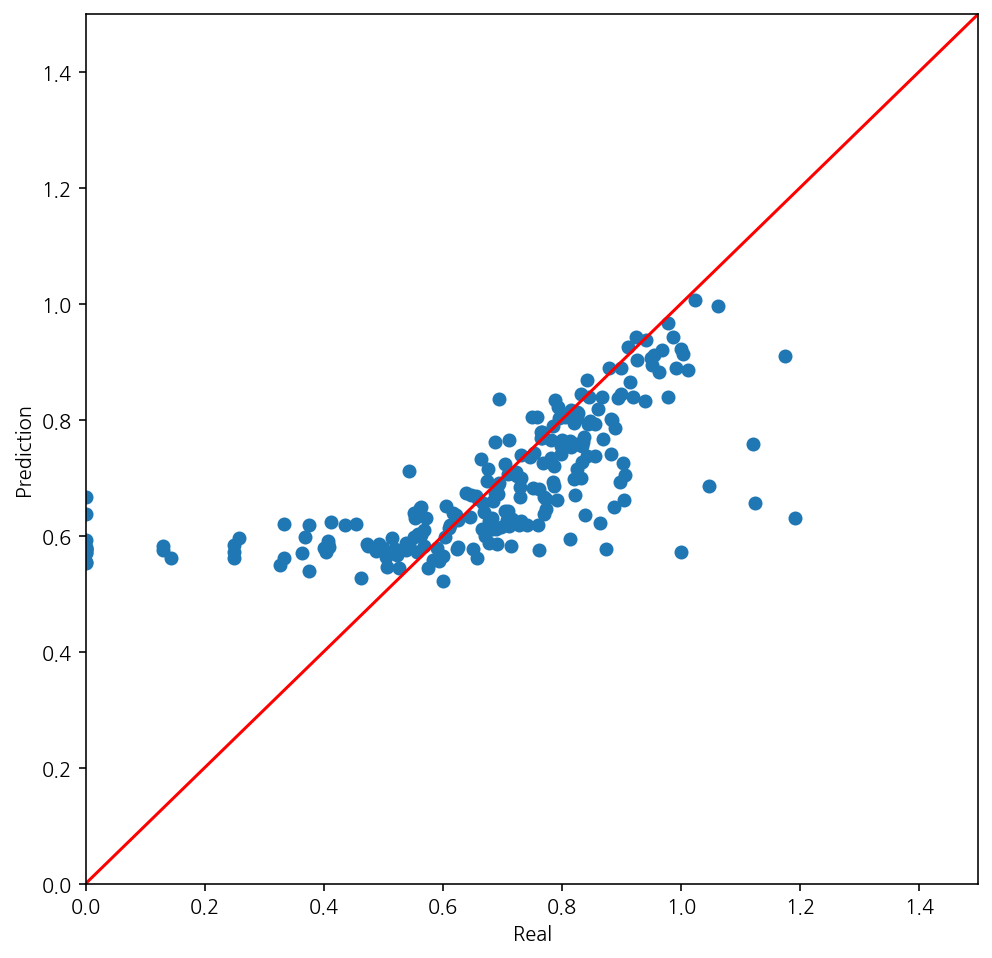

In [ ]:
# test 결과 파악하기
# 예측값과 실제값의 시각화
plt.figure(figsize=(8, 8))
plt.scatter(final['실제 OPS'], final['예측 OPS'])
r = np.linspace(start=0,stop=1.5)
t=r
plt.plot(r,t,'r')
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.xlim(0,1.5)
plt.ylim(0,1.5)

# HyperParameter

In [ ]:
import eli5 
from eli5.sklearn import PermutationImportance
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import shap
from scipy.stats import randint, uniform

## with SelectKBest

In [ ]:
LGB1 = make_pipeline(SimpleImputer(),
                     StandardScaler(),
                     SelectKBest(f_regression),
                     lgb.LGBMRegressor(random_state=2, n_jobs=-1)
                     )

# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
params = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'selectkbest__k': range(10, len(X_train.columns)+1),
    'lgbmregressor__n_estimators': [x for x in range(100,1100,100)],
    'lgbmregressor__max_depth': [x for x in range(3,20,2)],
    'lgbmregressor__max_features': uniform(0, 1),
    'lgbmregressor__class_weight': ["balanced",None]
}
test_error = []
rr = []

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    clf = RandomizedSearchCV(
    LGB1, 
    param_distributions=params, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1)
    
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)

    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    result.loc['LGBMRegressor(Select)_%d' %(year)] = [mae, rmse, r2, explained_variance_score(y_predict, y_test)]
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    rr.append(r2_score(y_test, y_predict))
    print(year, ": 완료")
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.2min finished


2010 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.0min finished


2011 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.3min finished


2012 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.3min finished


2013 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.5min finished


2014 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.4min finished


2015 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.3min finished


2016 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.5min finished


2017 : 완료
test error :  0.1253027950982315
test std :  0.015301004571483706
r2 :  0.15574804864730069




In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

최적 하이퍼파라미터:  {'lgbmregressor__class_weight': None, 'lgbmregressor__max_depth': 3, 'lgbmregressor__max_features': 0.18684857262779098, 'lgbmregressor__n_estimators': 300, 'selectkbest__k': 88, 'simpleimputer__strategy': 'median'}
MAE:  0.1237238511909294


,24,45,46,7,36,35,25,12,44,48,43,33,26,2,38,21,10,4,32,19,11,30,42,28,13,8,20,27,6,18,9,1,31,16,5,3,14,34,47,40,39,23,41,17,37,15,22,29,49,0
mean_fit_time,1.2023,0.5623,0.7661,0.2536,0.6482,2.2025,0.9204,3.9945,2.3090,0.4868,2.9268,6.3883,14.6162,5.1352,4.6874,6.0292,0.4323,13.9960,3.1360,0.7131,1.0567,2.1315,0.9083,0.2827,1.5690,5.7981,0.2855,1.0856,15.9045,2.3251,2.2621,1.1164,7.1995,5.7416,3.6634,6.5646,12.7136,3.9656,0.9672,13.5760,8.2818,0.8462,8.4341,1.1006,7.4397,10.9028,3.6176,4.7618,2.3191,4.6989
std_fit_time,0.0113,0.0050,0.0222,0.0071,0.0411,0.0684,0.0269,0.0740,0.0799,0.0151,0.0833,0.2579,0.0401,0.2137,0.0611,0.2345,0.0099,0.2647,0.2788,0.0127,0.1058,0.0454,0.0044,0.0166,0.0719,0.3627,0.0111,0.0291,0.9421,0.0138,0.1229,0.0081,0.0648,0.2066,0.1674,0.3121,0.0662,0.2614,0.0160,0.2543,0.3240,0.0418,0.1624,0.0111,0.5420,0.0841,0.3136,0.4375,0.4484,0.5091
mean_score_time,0.0319,0.0210,0.0270,0.0212,0.0263,0.0391,0.0591,0.0541,0.0572,0.0177,0.0523,0.0981,0.2523,0.1428,0.0991,0.1842,0.0171,0.2349,0.1194,0.0189,0.0234,0.0378,0.0214,0.0214,0.0380,0.1888,0.0209,0.0236,0.2952,0.1535,0.0525,0.0766,0.1459,0.1011,0.0562,0.1360,0.2585,0.0672,0.0420,0.2525,0.2017,0.0510,0.1747,0.0513,0.1374,0.2319,0.0795,0.1283,0.1118,0.3044
std_score_time,0.0003,0.0002,0.0002,0.0007,0.0004,0.0066,0.0019,0.0013,0.0051,0.0005,0.0027,0.0013,0.0145,0.0044,0.0094,0.0108,0.0005,0.0083,0.0413,0.0004,0.0019,0.0010,0.0009,0.0006,0.0015,0.0108,0.0013,0.0012,0.0265,0.0102,0.0017,0.0033,0.0308,0.0044,0.0002,0.0072,0.0232,0.0034,0.0018,0.0162,0.0096,0.0021,0.0118,0.0027,0.0105,0.0172,0.0011,0.0038,0.0172,0.1298
param_lgbmregressor__class_weight,None,None,None,None,None,None,None,None,None,balanced,None,None,None,None,None,None,balanced,None,None,balanced,balanced,balanced,balanced,balanced,balanced,None,balanced,balanced,balanced,None,balanced,None,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
param_lgbmregressor__max_depth,3,7,5,15,5,7,3,11,15,3,11,9,15,9,15,19,3,17,15,5,11,5,7,3,11,17,11,9,19,15,5,11,7,7,7,5,15,7,5,17,9,3,9,13,19,15,5,5,11,19
param_lgbmregressor__max_features,0.1868,0.1477,0.9733,0.3607,0.8985,0.9385,0.6586,0.4361,0.4006,0.7636,0.4617,0.8208,0.6552,0.9601,0.9856,0.3864,0.0228,0.5063,0.1073,0.2246,0.6485,0.5048,0.6564,0.6701,0.7312,0.1844,0.2553,0.5167,0.9481,0.3035,0.0488,0.6437,0.5588,0.4520,0.3570,0.7256,0.9484,0.7868,0.0317,0.1094,0.6755,0.3247,0.8000,0.1702,0.1996,0.6086,0.1608,0.7400,0.0471,0.1733
param_lgbmregressor__n_estimators,300,100,200,100,200,200,800,300,300,100,300,600,900,800,500,700,100,900,500,100,100,300,100,200,200,800,100,100,1000,700,500,500,800,700,400,1000,900,500,400,900,1000,700,900,300,600,900,700,1000,700,900
param_selectkbest__k,88,35,37,10,32,86,20,78,39,97,56,73,100,41,47,41,77,81,28,66,55,97,62,15,44,35,13,58,96,15,55,11,94,79,73,95,91,70,27,96,68,21,77,20,65,71,64,58,23,25
param_simpleimputer__strategy,median,mean,median,mean,mean,mean,median,mean,mean,mean,median,mean,median,mean,median,mean,mean,mean,mean,median,median,mean,mean,median,median,mean,mean,median,median,mean,median,median,mean,median,median,mean,median,median,mean,mean,median,median,mean,mean,mean,mean,mean,median,median,mean


In [ ]:
best = total.copy()
# 만들어진 모델에거 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

# 예측
best['y_hat'] = pipe.predict(X)

# 타자별 예측값 feature에 저장
best['batter_ops'] = best['batter_id'].apply(lambda x: best[best['batter_id']==x]['y_hat'].values[0])

best = best[['batter_name','batter_ops']]
best = pd.merge(best, Y, how='left', left_on=['batter_name'], right_on=['batter_name'])
best.dropna(axis=0,inplace=True)

mae = mean_absolute_error(list(best['batter_ops']),list(best['OPS']))
mse = mean_squared_error(best['batter_ops'],best['OPS'])
rmse = math.sqrt(mse)
r2 = r2_score(best['batter_ops'],best['OPS'])

result.loc['LGBMRegressor(Select)_Best'] = [mae, rmse, r2, explained_variance_score(best['batter_ops'],best['OPS'])]

(0.0, 1.5)

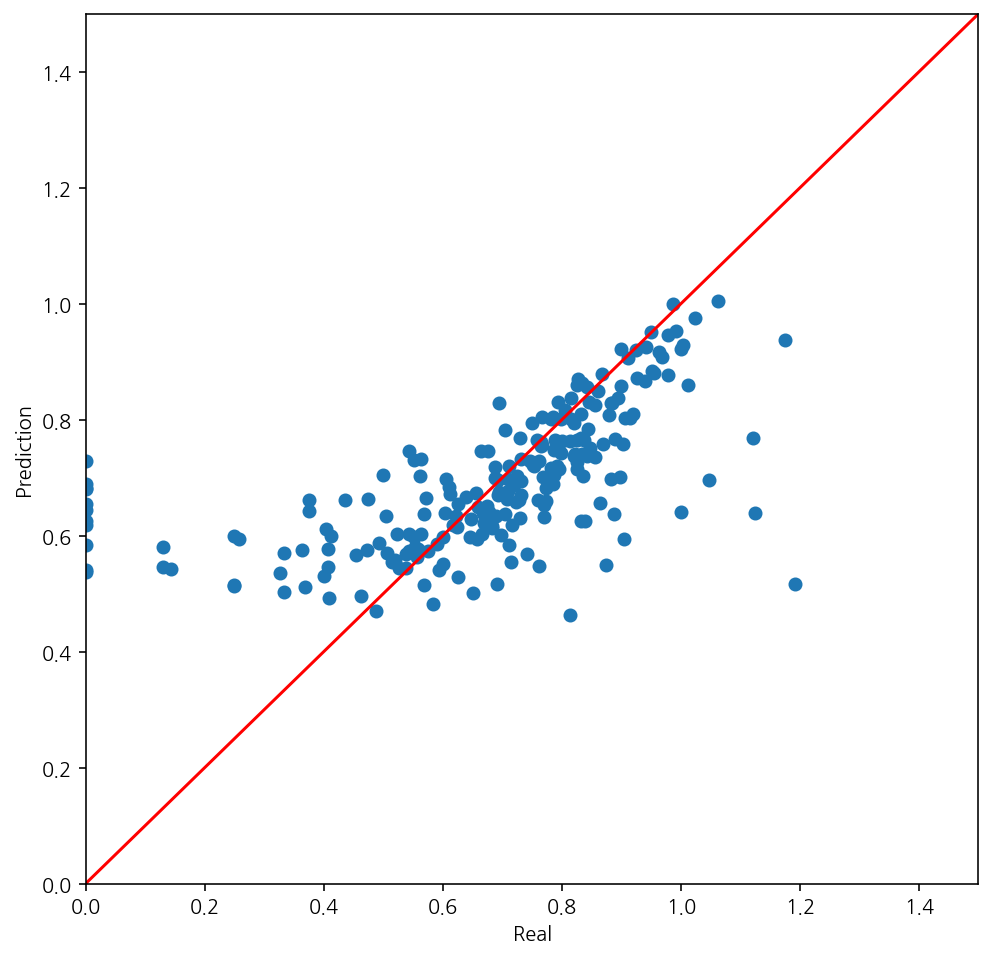

In [ ]:
best.rename(columns = {'batter_name' : '선수명', 'batter_ops':'예측 OPS','OPS':'실제 OPS'}, inplace = True)

# test 결과 파악하기
# 예측값과 실제값의 시각화
plt.figure(figsize=(8, 8))
plt.scatter(best['실제 OPS'], best['예측 OPS'])
r = np.linspace(start=0,stop=1.5)
t=r
plt.plot(r,t,'r')
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.xlim(0,1.5)
plt.ylim(0,1.5)

## without SelectKBest

In [ ]:
LGB2 = Pipeline([
    ('preprocessing', make_pipeline(SimpleImputer(), StandardScaler())),
    ('lgb', lgb.LGBMRegressor(random_state=2, n_jobs=-1)) 
])

# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
params = {
    'preprocessing__simpleimputer__strategy': ['mean', 'median'],
    'lgb__n_estimators': [x for x in range(100,1100,100)],
    'lgb__max_depth': [x for x in range(3,20,2)],
    'lgb__max_features': uniform(0, 1),
    'lgb__class_weight': ["balanced",None]
}
test_error = []
rr = []

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    clf2 = RandomizedSearchCV(
    LGB2, 
    param_distributions=params, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1)
    
    clf2.fit(X_train, y_train)
    clf2.score(X_test, y_test)
    y_predict = clf2.predict(X_test)

    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    result.loc['LGBMRegressor(w/o Select)_%d' %(year)] = [mae, rmse, r2, explained_variance_score(y_predict, y_test)]
    
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    rr.append(r2_score(y_test, y_predict))
    print(year, ": 완료")

print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.1min finished


2010 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.0min finished


2011 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.8min finished


2012 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.4min finished


2013 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.5min finished


2014 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.7min finished


2015 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.5min finished


2016 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.5min finished


2017 : 완료
test error :  0.12396597690826702
test std :  0.016672502675756175
r2 :  0.19282292431810605




In [ ]:
print('최적 하이퍼파라미터: ', clf2.best_params_)
print('MAE: ', -clf2.best_score_)
pd.DataFrame(clf2.cv_results_).sort_values(by='rank_test_score').T

최적 하이퍼파라미터:  {'lgb__class_weight': None, 'lgb__max_depth': 17, 'lgb__max_features': 0.8067338403817681, 'lgb__n_estimators': 100, 'preprocessing__simpleimputer__strategy': 'mean'}
MAE:  0.12305280459231316


,11,31,10,48,29,38,47,45,49,14,3,46,17,23,20,13,27,44,28,6,2,0,25,40,15,22,34,4,37,39,9,32,30,12,24,42,8,36,35,43,1,16,33,26,19,21,5,18,41,7
mean_fit_time,1.9032,1.8907,1.9269,3.3757,2.4500,2.4919,7.2640,5.1888,6.2941,9.9566,8.8508,11.1793,4.0925,6.4944,6.5930,12.1994,12.4287,12.5610,16.8386,16.6106,12.3492,12.4746,15.5290,1.3331,1.3969,1.7128,1.5175,2.3148,2.2972,4.2321,4.1456,5.8610,4.6733,4.9283,5.1352,1.3238,5.5291,8.2428,5.8863,7.3463,6.4299,6.9577,6.6377,12.1669,11.9672,13.3688,13.2646,13.0572,16.4318,14.5467
std_fit_time,0.0430,0.0234,0.0332,0.0255,0.0324,0.0255,0.2078,0.1258,0.7643,0.2004,0.2277,0.1949,0.0360,0.0735,0.0537,0.2398,0.3514,0.0967,0.0869,0.1708,0.2976,0.7196,0.0814,0.0365,0.0763,0.0228,0.0385,0.0994,0.0588,0.1201,0.0703,0.2541,0.1047,0.0289,0.1927,0.0215,0.2333,0.2029,0.2817,0.4318,0.1180,0.1319,0.2192,0.6204,0.6392,0.1630,0.5097,0.3321,0.9257,0.0843
mean_score_time,0.0261,0.0276,0.0254,0.0436,0.0415,0.0538,0.1042,0.0723,0.0787,0.1708,0.1131,0.2056,0.0903,0.0832,0.0986,0.1923,0.1923,0.2543,0.3062,0.3049,0.1942,0.2271,0.2910,0.0229,0.0233,0.0258,0.0237,0.0349,0.0352,0.0596,0.0577,0.0874,0.0616,0.0727,0.0871,0.0326,0.1057,0.1110,0.0916,0.1536,0.0829,0.1431,0.1480,0.2369,0.2014,0.2650,0.2672,0.2297,0.2951,0.2823
std_score_time,0.0013,0.0042,0.0016,0.0032,0.0002,0.0011,0.0127,0.0046,0.0070,0.0115,0.0099,0.0137,0.0034,0.0049,0.0182,0.0168,0.0162,0.0486,0.0196,0.0239,0.0182,0.0184,0.0159,0.0005,0.0010,0.0024,0.0015,0.0009,0.0012,0.0031,0.0053,0.0051,0.0071,0.0048,0.0061,0.0012,0.0067,0.0108,0.0041,0.0064,0.0078,0.0173,0.0135,0.0161,0.0119,0.0189,0.0209,0.0168,0.0194,0.0213
param_lgb__class_weight,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
param_lgb__max_depth,17,15,19,13,5,3,11,9,15,11,19,11,3,13,13,17,19,13,15,15,19,9,13,7,7,13,9,7,7,11,11,9,13,9,5,3,5,19,7,5,13,7,5,11,19,11,11,19,19,13
param_lgb__max_features,0.8067,0.9247,0.0526,0.7401,0.4627,0.3980,0.0119,0.6358,0.0119,0.6535,0.8605,0.4968,0.4809,0.7746,0.3680,0.8441,0.3691,0.8496,0.1447,0.1941,0.5427,0.5070,0.5815,0.7258,0.3381,0.5984,0.4931,0.4437,0.7867,0.5760,0.9092,0.9416,0.5098,0.1269,0.5859,0.9396,0.2549,0.0747,0.5007,0.6965,0.1003,0.1264,0.3225,0.7942,0.5180,0.4901,0.0785,0.0360,0.0334,0.8138
param_lgb__n_estimators,100,100,100,200,300,600,500,400,400,700,500,800,1000,400,400,700,700,800,1000,1000,700,1000,1000,100,100,100,100,200,200,300,300,500,300,400,700,300,800,500,600,1000,400,700,1000,900,700,1000,1000,800,1000,1000
param_preprocessing__simpleimputer__strategy,mean,mean,median,mean,mean,median,mean,median,median,median,mean,median,mean,median,median,mean,mean,mean,mean,median,median,mean,median,median,median,mean,median,mean,median,median,median,mean,median,median,mean,median,mean,mean,mean,mean,median,mean,median,mean,mean,mean,mean,mean,median,median
params,"{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__class_weight': None, 'lgb__max_depth': ...","{'lgb__

In [ ]:
best2 = total.copy()
# 만들어진 모델에거 가장 성능이 좋은 모델을 불러옵니다.
pipe2 = clf2.best_estimator_

# 예측
best2['y_hat'] = pipe2.predict(X)

# 타자별 예측값 feature에 저장
best2['batter_ops'] = best2['batter_id'].apply(lambda x: best2[best2['batter_id']==x]['y_hat'].values[0])

best2 = best2[['batter_name','batter_ops']]
best2 = pd.merge(best2, Y, how='left', left_on=['batter_name'], right_on=['batter_name'])
best2.dropna(axis=0,inplace=True)

mae = mean_absolute_error(best2['batter_ops'],best2['OPS'])
mse = mean_squared_error(best2['batter_ops'],best2['OPS'])
rmse = math.sqrt(mse)
r2 = r2_score(best2['batter_ops'],best2['OPS'])

result.loc['LGBMRegressor(w/Select)_Best'] = [mae, rmse, r2, explained_variance_score(best2['batter_ops'],best2['OPS'])]

best2

,batter_name,batter_ops,OPS
0,가르시아,0.7482,0.9020
1,강경학,0.6342,0.7740
2,강구성,0.7380,0.6000
3,강민국,0.6154,0.5000
4,강민호,0.8358,0.7880
...,...,...,...
222,홍재호,0.4558,0.7150
223,홍창기,0.5583,0.6780
224,황윤호,0.5651,0.3750
225,황재균,0.7820,0.8840


(0.0, 1.5)

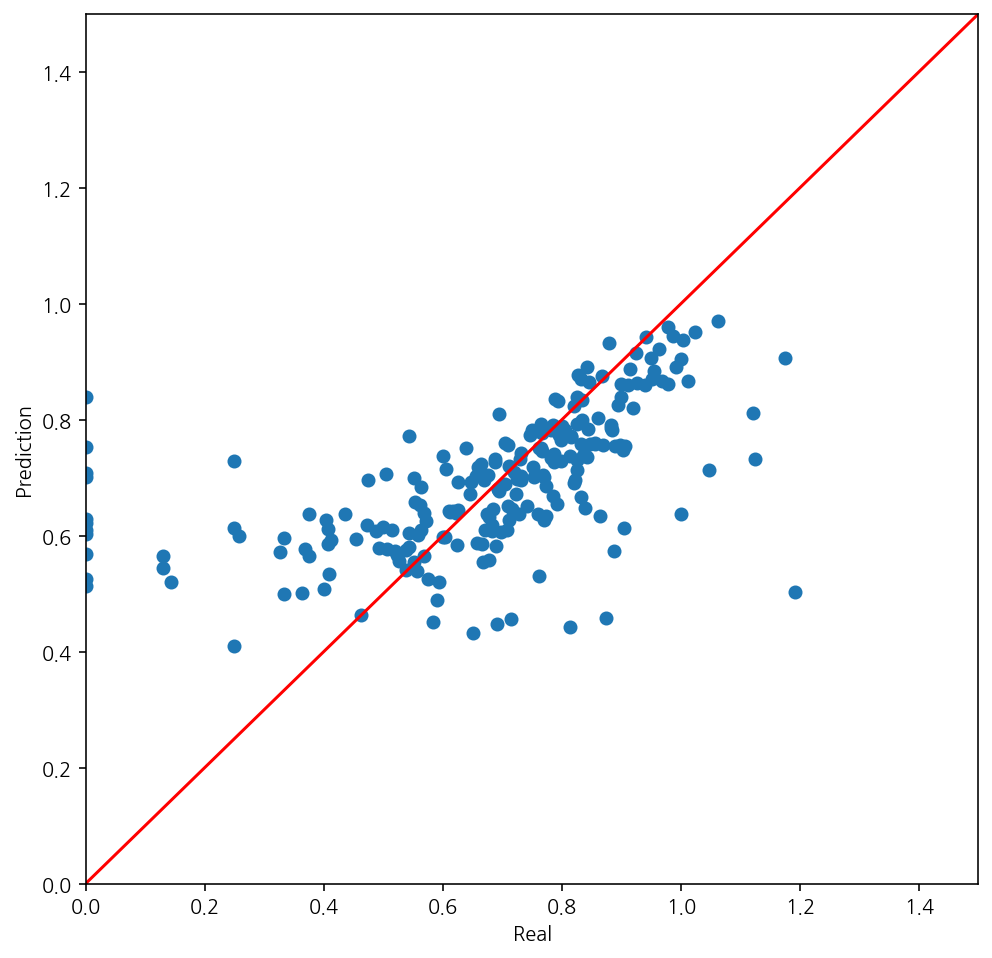

In [ ]:
best2.rename(columns = {'batter_name' : '선수명', 'batter_ops':'예측 OPS','OPS':'실제 OPS'}, inplace = True)

# test 결과 파악하기
# 예측값과 실제값의 시각화
plt.figure(figsize=(8, 8))
plt.scatter(best2['실제 OPS'], best2['예측 OPS'])
r = np.linspace(start=0,stop=1.5)
t=r
plt.plot(r,t,'r')
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.xlim(0,1.5)
plt.ylim(0,1.5)

In [ ]:
best2.sort_values(by='예측 OPS', ascending=True)[:10]

,선수명,예측 OPS,실제 OPS
59,나원탁,0.4096,0.2500
144,이병휘,0.4323,0.6510
172,장승현,0.4421,0.8140
97,백용환,0.4479,0.6910
160,이준수,0.4506,0.5830
222,홍재호,0.4558,0.7150
176,전민재,0.4575,0.8750
133,윤병호,0.4630,0.4620
183,정상호,0.4889,0.5900
24,김민수,0.4997,0.3340


In [ ]:
new = best2.copy()
new['diff'] = abs(new['실제 OPS'] - new['예측 OPS'])
new.sort_values(by='diff', ascending=True)[:10]

,선수명,예측 OPS,실제 OPS,diff
47,김태균,0.8340,0.8340,0.0000
221,호잉,0.9423,0.9420,0.0003
133,윤병호,0.4630,0.4620,0.0010
90,박한이,0.7820,0.7810,0.0010
138,이대수,0.5986,0.6000,0.0014
181,정범모,0.5407,0.5390,0.0017
195,주효상,0.5656,0.5680,0.0024
78,박동원,0.7315,0.7290,0.0025
79,박민우,0.8244,0.8210,0.0034
145,이상호,0.5551,0.5510,0.0041


In [ ]:
result.sort_values(by='R squared')

,MAE,RMSE,R squared,variance
LGBMRegressor(w/Select)_Best,0.1285,0.2015,-1.8567,-1.8388
LGBMRegressor(Select)_Best,0.1226,0.1962,-1.7589,-1.7427
Baseline,0.1404,0.1907,0.0000,-2950051981767508101154589376512.0000
LGBMRegressor(Select)_2013,0.1242,0.1735,0.0575,-2.1203
RandomForest_2015,0.1353,0.1988,0.0937,-2.1645
LGBMRegressor(Select)_2010,0.1274,0.1599,0.1054,-1.1511
LGBMRegressor(Select)_2011,0.1048,0.1589,0.1093,-1.5292
LGBMRegressor(w/o Select)_2011,0.1058,0.1580,0.1196,-1.8111
LGBMRegressor(Select)_2012,0.1159,0.1575,0.1333,-1.2517
SVR_2016,0.1495,0.2356,0.1354,-3.2441


## 특성중요도

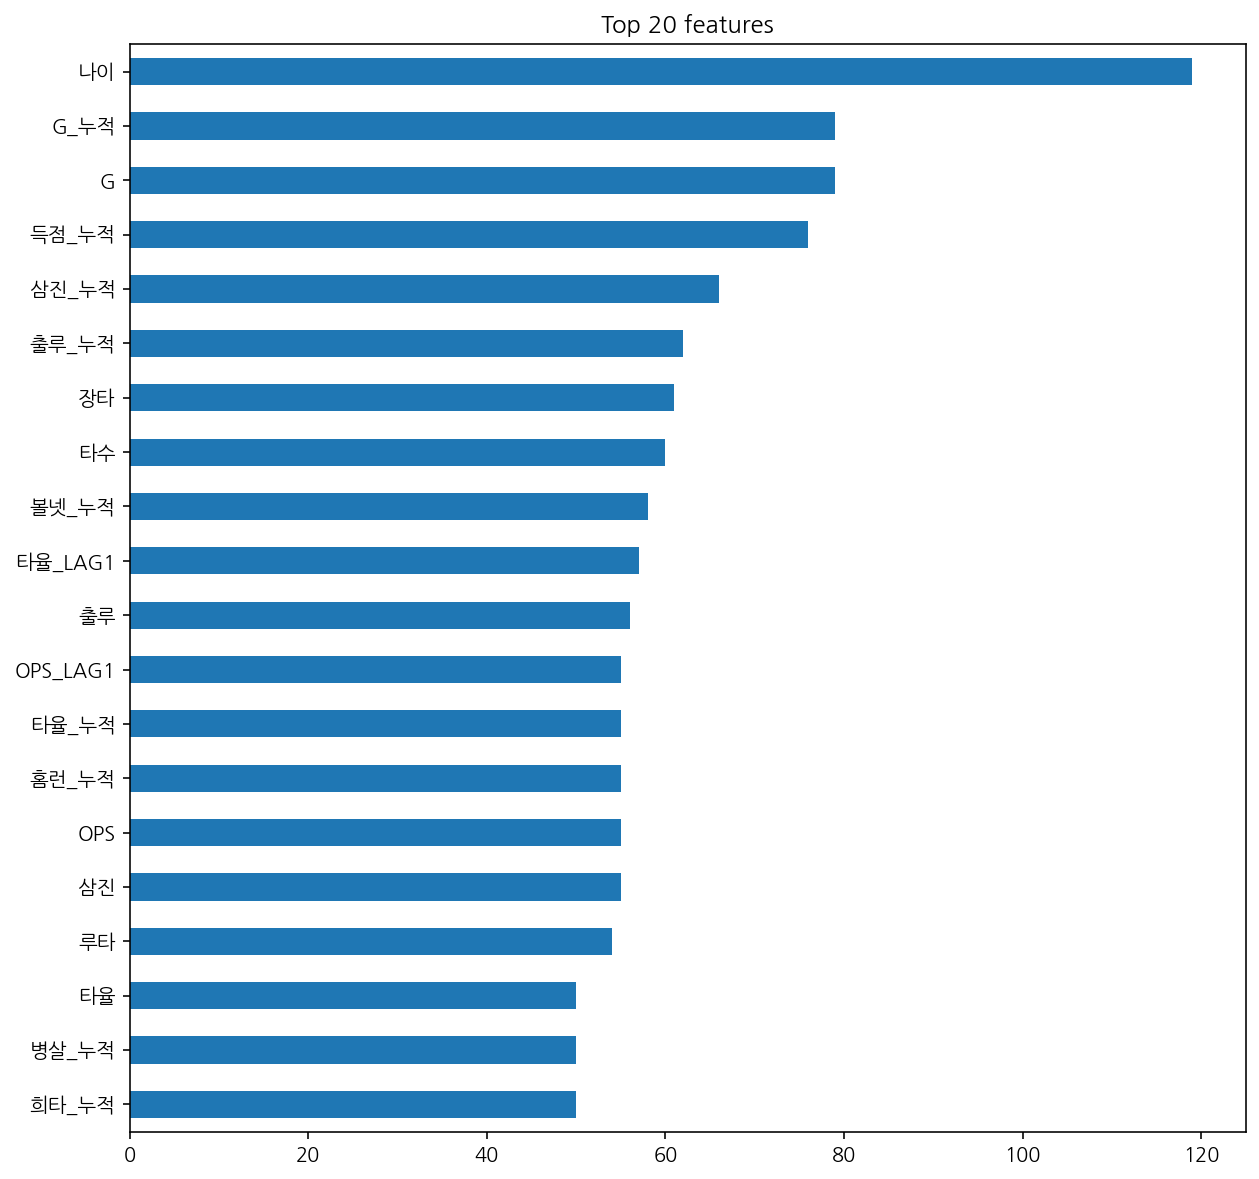

In [ ]:
p = pipe2.named_steps['lgb']
importances = pd.Series(p.feature_importances_, X_train.columns)
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
print(importances.sort_values()[-20:])

희타_누적        50
병살_누적        50
타율           50
루타           54
삼진           55
OPS          55
홈런_누적        55
타율_누적        55
OPS_LAG1     55
출루           56
타율_LAG1      57
볼넷_누적        58
타수           60
장타           61
출루_누적        62
삼진_누적        66
득점_누적        76
G            79
G_누적         79
나이          119
dtype: int64


In [ ]:
pipe2.named_steps

{'lgb': LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=17,
               max_features=0.8067338403817681, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=2,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0),
 'preprocessing': Pipeline(memory=None,
          steps=[('simpleimputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='mean',
                                verbose=0)),
                 ('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True))],
          verbose=False)}

## Permu

In [ ]:
# permuter 정의
permuter = PermutationImportance(
    pipe2.named_steps['lgb'], # model
    scoring='r2', # metric, ['neg_mean_absolute_error','neg_root_mean_squared_error']
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    pipe2.fit(X_train, y_train, lgb__sample_weight=weight)
    permuter.fit(X_test, y_test)

# 특성별 score 확인
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

득점_LAG2   -0.0118
병살_LAG2   -0.0096
타율_LAG1   -0.0077
희타_누적     -0.0067
홈런_LAG1   -0.0067
            ...  
홈런_누적      0.0155
삼진_LAG1    0.0204
홈런         0.0323
1타_LAG2    0.0459
OPS        0.1112
Length: 101, dtype: float64

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.1112 ± 0.0338,OPS
0.0459 ± 0.0134,1타_LAG2
0.0323 ± 0.0654,홈런
0.0204 ± 0.0136,삼진_LAG1
0.0155 ± 0.0164,홈런_누적
0.0152 ± 0.0078,2타_LAG2
0.0150 ± 0.0134,고4_누적
0.0110 ± 0.0061,1타_LAG1
0.0108 ± 0.0060,루타_LAG1
0.0080 ± 0.0042,삼진_LAG2


In [ ]:
print('특성 삭제 전:', X_train.shape, X_test.shape)

특성 삭제 전: (4512, 101) (181, 101)


In [ ]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_test_selected = X_test[features]

print('특성 삭제 후:', X_train_selected.shape, X_test_selected.shape)

특성 삭제 후: (4512, 30) (181, 30)


In [ ]:
# pipeline 다시 정의
pipe2 = clf2.best_estimator_
pipe2.fit(X_train_selected, y_train);

print('검증 정확도: ', pipe2.score(X_test_selected, y_test))
go = pipe2.predict(X_test_selected)

mae = mean_absolute_error(go, y_test)
mse = mean_squared_error(go, y_test)
rmse = math.sqrt(mse)
r2 = r2_score(go, y_test)

result.loc['LGBMRegressor_MDA'] = [mae, rmse, r2, explained_variance_score(go, y_test)]
result

검증 정확도:  0.29010464830701355


,MAE,RMSE,R squared,variance
Baseline,0.1404,0.1907,0.0000,-2950051981767508101154589376512.0000
RandomForest_2010,0.1127,0.1445,0.2687,-1.1305
RandomForest_2011,0.0999,0.1486,0.2210,-1.2198
RandomForest_2012,0.1088,0.1535,0.1763,-1.7676
RandomForest_2013,0.1222,0.1661,0.1369,-2.4945
RandomForest_2014,0.1480,0.2192,0.1473,-4.9850
RandomForest_2015,0.1353,0.1988,0.0937,-2.1645
RandomForest_2016,0.1465,0.2282,0.1894,-2.6179
RandomForest_2017,0.1164,0.1661,0.1368,-0.7148
XGBoost_2010,0.1130,0.1450,0.2639,-1.0714


In [ ]:
# 순열 중요도의 평균 감소값과 그 표준편차의 차가 양수인 특징들을 확인할 수 있습니다.
permuter.feature_importances_ - permuter.feature_importances_std_ > 0

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
       False,  True, False, False, False,  True, False, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [ ]:
# 회귀계수
# 회귀계수(coefficients)를 이용해 변수와 타겟 관계를 해석할 수 있지만 트리모델은 할 수 없습니다.
# 대신 부분의존그림(Partial dependence plots)을 사용하여 개별 특성과 타겟간의 관계를 볼 수 있습니다.
# coefficients = pipe2.named_steps['linear'].coef_
# pd.Series(coefficients, features)

## PDP

### parameter 조정 후 gradient

In [ ]:
gradient = Pipeline([
    ('preprocessing', make_pipeline(SimpleImputer(), StandardScaler())),
    ('gr', GradientBoostingRegressor(random_state=2)) 
], verbose=1)


# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
params = {
    'preprocessing__simpleimputer__strategy': ['mean', 'median'],
    'gr__n_estimators': [x for x in range(100,1100,100)],
    'gr__max_depth': [x for x in range(3,20,2)],
    'gr__max_features': uniform(0, 1)
}
rr = []
test_error=[]

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    gr_clf = RandomizedSearchCV(
    gradient, 
    param_distributions=params, 
    n_iter=50, 
    cv=3, 
    scoring='neg_root_mean_squared_error',  
    verbose=1,
    n_jobs=-1)
    
    gr_clf.fit(X_train, y_train)
    gr_clf.score(X_test, y_test)
    print(gr_clf.score(X_test, y_test))
    y_predict = gr_clf.predict(X_test)
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    print(year, ": 완료")
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 27.0min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   5.3s
-0.1481425475985221
2010 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 24.5min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   1.9s
-0.1525867290761053
2011 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 40.2min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   2.3s
-0.15023148967087613
2012 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 38.1min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   1.0s
-0.15976392353993674
2013 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 48.1min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   1.2s
-0.2161831097083529
2014 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 33.2min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   2.4s
-0.19048114221975107
2015 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 34.3min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   2.2s
-0.2287737287849429
2016 : 완료
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 45.2min finished


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   6.0s
-0.16193281542667862
2017 : 완료
test error :  0.12360904595021388
test std :  0.01821214111386173
r2 :  nan




In [ ]:
print('최적 하이퍼파라미터: ', gr_clf.best_params_)
print('RMSE: ', -gr_clf.best_score_)
pd.DataFrame(gr_clf.cv_results_).sort_values(by='rank_test_score').T

best_gr = total.copy()
# 만들어진 모델에거 가장 성능이 좋은 모델을 불러옵니다.
pipe_gr = gr_clf.best_estimator_

# 예측
best_gr['y_hat'] = pipe_gr.predict(X)

# 타자별 예측값 feature에 저장
best_gr['batter_ops'] = best_gr['batter_id'].apply(lambda x: best_gr[best_gr['batter_id']==x]['y_hat'].values[0])

best_gr = best_gr[['batter_name','batter_ops']]
best_gr = pd.merge(best_gr, Y, how='left', left_on=['batter_name'], right_on=['batter_name'])
best_gr.dropna(axis=0,inplace=True)

mae = mean_absolute_error(best_gr['batter_ops'],best_gr['OPS'])
mse = mean_squared_error(best_gr['batter_ops'],best_gr['OPS'])
rmse = math.sqrt(mse)
r2 = r2_score(best_gr['batter_ops'],best_gr['OPS'])

result.loc['Gradient(w/Select)_Best'] = [mae, rmse, r2, explained_variance_score(best_gr['batter_ops'],best_gr['OPS'])]

best_gr

최적 하이퍼파라미터:  {'gr__max_depth': 3, 'gr__max_features': 0.9080504281789668, 'gr__n_estimators': 100, 'preprocessing__simpleimputer__strategy': 'median'}
RMSE:  0.17044450588760607


,batter_name,batter_ops,OPS
0,가르시아,0.7293,0.9020
1,강경학,0.6422,0.7740
2,강구성,0.5959,0.6000
3,강민국,0.6476,0.5000
4,강민호,0.7856,0.7880
...,...,...,...
222,홍재호,0.5391,0.7150
223,홍창기,0.6343,0.6780
224,황윤호,0.5162,0.3750
225,황재균,0.8157,0.8840


In [ ]:
# permuter 정의
permuter = PermutationImportance(
    pipe_gr.named_steps['gr'], # model
    scoring='r2', # metric, ['neg_mean_absolute_error','neg_root_mean_squared_error']
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    pipe_gr.fit(X_train, y_train, gr__sample_weight=weight)
    permuter.fit(X_test, y_test)

# 특성별 score 확인
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing gr, total=   4.6s


ValueError: ignored

### basic gradient parameter

In [ ]:
gradient = Pipeline([
    ('preprocessing', make_pipeline(SimpleImputer(), StandardScaler())),
    ('gr', GradientBoostingRegressor(n_estimators=300, random_state=2)) 
], verbose=1)

rr = []
test_error=[]

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    weight = train['타수']
    gradient.fit(X_train, y_train, gr__sample_weight=weight)
    gradient.score(X_test, y_test)
    print(gradient.score(X_test, y_test))
    y_predict = gradient.predict(X_test)

    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test,y_predict)
    result.loc['Gradient %d' %(year)] = [mae, rmse, r2, explained_variance_score(y_predict, y_test)]
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    rr.append(r2_score(y_test, y_predict))
    print(year, ": 완료")
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(rr))
print("\n")

In [ ]:
X_test

In [ ]:
gradient.named_steps

In [ ]:
# permuter 정의
permuter = PermutationImportance(
    gradient.named_steps['gr'], # model
    scoring='r2', # metric, ['neg_mean_absolute_error','neg_root_mean_squared_error']
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

for year in range(2010, 2018):    
    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]

    gradient.fit(X_train, y_train)
    permuter.fit(X_test, y_test)

# 특성별 score 확인
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

In [ ]:
print('특성 삭제 전:', X_train.shape, X_test.shape)

minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_test_selected = X_test[features]

print('특성 삭제 후:', X_train_selected.shape, X_test_selected.shape)

In [ ]:
# pipeline 다시 정의
pipe_gr = gradient
pipe_gr.fit(X_train_selected, y_train);

print('검증 정확도: ', pipe_gr.score(X_test_selected, y_test))
go = pipe_gr.predict(X_test_selected)

mae = mean_absolute_error(go, y_test)
mse = mean_squared_error(go, y_test)
rmse = math.sqrt(mse)
r2 = r2_score(go, y_test)

result.loc['Gradient_MDA'] = [mae, rmse, r2, explained_variance_score(go, y_test)]
result

In [ ]:
# 회귀계수
# 회귀계수(coefficients)를 이용해 변수와 타겟 관계를 해석할 수 있지만 트리모델은 할 수 없습니다.
# 대신 부분의존그림(Partial dependence plots)을 사용하여 개별 특성과 타겟간의 관계를 볼 수 있습니다.
coefficients = pipe_gr.named_steps['gr'].coef_
pd.Series(coefficients, features)

### 1특성 사용

In [ ]:
X_test_selected.columns

In [ ]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = '병살_누적'

### Gradient

In [ ]:
# Gradient
isolated = pdp_isolate(
    model=pipe_gr, 
    dataset=X_test_selected, 
    model_features=X_test_selected.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
# PDP 를 10개의 ICE(Individual Conditional Expectation) curves와 함께 그려보겠습니다.¶
# 한 ICE 곡선은 하나의 관측치에 대해 관심 특성을 변화시킴에 따른 타겟값 변화 곡선이고 이 ICE들의 평균이 PDP 입니다.
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

### LGBM

In [ ]:
# LGBM
isolated = pdp_isolate(
    model=pipe2, 
    dataset=X_test_selected, 
    model_features=X_test_selected.columns, 
    feature='홈런',
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)

pdp_plot(isolated, feature_name='홈런');

In [ ]:
# PDP 를 10개의 ICE(Individual Conditional Expectation) curves와 함께 그려보겠습니다.¶
# 한 ICE 곡선은 하나의 관측치에 대해 관심 특성을 변화시킴에 따른 타겟값 변화 곡선이고 이 ICE들의 평균이 PDP 입니다.
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

In [ ]:
isolated = pdp_isolate(
    model=pipe2, 
    dataset=X_test_selected, 
    model_features=X_test_selected.columns, 
    feature=feature,
    # grid point를 크게 주면 겹치는 점이 생겨 Number of unique grid points는 grid point 보다 작을 수 있습니다.
    num_grid_points=100, # grid 포인트를 더 줄 수 있습니다. default = 10
)

print('예측수: ',len(X_test_selected) * 100)

In [ ]:
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True
         , frac_to_plot=100 # ICE curves는 100개
         , plot_pts_dist=True )

# plt.xlim(20000,150000);

## SHAP

In [ ]:
clf2.best_estimator_

In [ ]:
import shap
# pipe2 = clf2.best_estimator_
# LGBMRegressor

row_to_show = 5
data_for_prediction = X_test_selected.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

explainer = shap.TreeExplainer(clf2.best_estimator_.named_steps['lgb'])
shap_values = explainer.shap_values(X_test_selected)
# shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_selected)
# shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
print(len(shap_values))
print(X_train_selected.shape)
print(shap_values.shape)
print(X_train_selected.columns)

In [ ]:
shap.summary_plot(shap_values, X_train_selected.iloc[:181]);

In [ ]:
shap.summary_plot(shap_values, X_train_selected.iloc[:181], plot_type="violin")

In [ ]:
shap.summary_plot(shap_values, X_train_selected.iloc[:181], plot_type="bar")

In [ ]:
shaps.sort_values(ascending=False).index